# Material de aula - Redes Neurais e Deep Learning

In [1]:
#Neste versão o bias não é incluido dentro do vetor de pesos e os calculos são separados


## <center> TDNN e Séries Temporais - LABORATÓRIO 04 </center>

### As topologias candidatas para serem adotadas no mapeamento do problema acima são especificadas como se segue:

1. Rede 1: 05 entradas (p = 05) com N1 = 10
2. Rede 2: 10 entradas (p = 10) com N1 = 15
3. Rede 3: 15 entradas (p = 15) com N1 = 25

Utilize a função de ativação logística para todos os neurônios, taxa de aprendizado $ \eta = 0.1 $ , fator de momentum $\alpha = 0.8$  e precisão $\epsilon = 0.5 \cdot 10^{-6}$.

In [2]:
#CÉLULA TDNN-LIB-01
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
#CÉLULA TDNN-LIB-02
def loadDataFile(filename) :
    '''
    Esta função faz o carregamento de dados de um arquivo separado por virgulas (csv)
    
    Parametros
    -----------
    filename -> nome do arquivo de dados em formato csv
    
    
    Retorno
    -----------  
    dataframe contendo os dados do arquivo formatados numericamente.
    '''
    
    dfFile = pd.read_csv(filename, sep=';', decimal=',', thousands='.')
    return dfFile

In [4]:
#CÉLULA TDNN-LIB-03
def sigmoid(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo sigmoide
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função sigmoide correspondente ao parametro z
    '''    
    return 1/(1+np.exp(-z))

In [5]:
#CÉLULA TDNN-LIB-04
def tanh_function(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo tangente hiperbolica
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função tangente hiperbolica correspondente ao parametro z
    '''        
    return np.tanh(z)

In [6]:
#CÉLULA TDNN-LIB-05
def forward_step(vInputs, vWeights, vBias) : 
    '''
    Processa o forward step
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna uma tupla contendo a saída das camadas da TDNN
    (Y_1, Y_2)
    '''
    
    W_1 = vWeights[0]
    W_2 = vWeights[1]
    
    B_1 = vBias[0]
    B_2 = vBias[1]

    #FORWARD STEP
    #Calcula saída do TDNN para todas as amostras, de uma vez.
    Y_0 = vInputs #so para ficar uniforme a nomenclatura dos termos
    I_1 = W_1 @ Y_0 + B_1
    Y_1 = sigmoid(I_1) #Função sigmoide na camada oculta, g1

    I_2 = W_2 @ Y_1 + B_2
    Y_2 = sigmoid(I_2) #Função linear na camada de saida, g2
    #FIM DO FORWARD STEP
    
    return (Y_1, Y_2)

In [7]:
#CÉLULA TDNN-LIB-06
def calcMSE(vInputs, vOutputs, vWeights, vBias) : 
    '''
    Calcula o Erro Quadratico Medio (Mean Squared Error) da TDNN
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com os vetores dos dados
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de MSE para o conjunto de dados e pesos do TDNN
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)
    nSamples = vInputs.shape[1]
       
    E_k = 1/2 * (vOutputs - Y_2)**2
    E_k = np.sum(E_k, axis=1)
    MSE = np.sum(E_k) / nSamples
    
    return np.asscalar(MSE)

# 1 - Implementação do algoritmo de treinamento da TDNN

Utilizando Jupyter e NumPy: para o problema apresentado, complete o código para construir as funções de treinamento da TDNN

## 1.1 - Ajuste o código que realiza o forward step da TDNN

In [8]:
#CÉLULA TDNN-LIB-07
def tdnn_train_batch(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento da TDNN
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
        
    #Determine numero de entradas do TDNN e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);
    
    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    #CRIE VARIAVEIS PARA ARMAZENAR AS Matrizes das iterações anteriores para uso de momentum
    W_1_old = W_1
    B_1_old = B_1
    #IMPLEMENTE O CÓDIGO AQUI - INICIO

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = np.random.rand(nNeurons, 1);
   
    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    #CRIE VARIAVEIS PARA ARMAZENAR AS Matrizes das iterações anteriores para uso de momentum
    W_2_old = W_2
    B_2_old = B_2
    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
        
    for epochCounter in range(max_epochs) :
        Y_0 = vInputs #esta atribuição é apenas para manter uniformidade de nomenclatura
        (Y_1, Y_2) = forward_step(vInputs, [W_1, W_2], [B_1, B_2])       

        #INICIO - BACKWARD STEP
        #A derivada de g2 é igual a Y_2 * (1 - Y_2)
        #Ajuste de pesos Camada Oculta - Camada de Saída
        diff_g2 = Y_2 * (1 - Y_2)
        #Gradiente local
        delta_2 = (vOutputs - Y_2) * diff_g2
        
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #AJUSTE OS VALORES DE W_2 E B_2        
        #Ajuste dos pesos
        W_2 += alpha * (W_2 - W_2_old) + eta * delta_2 @ Y_1.T
        B_2 += alpha * (B_2 - B_2_old) + eta * np.sum(delta_2, axis=1, keepdims=True) #Soma das colunas de delta_2. Podemos multiplicar por um vetor coluna de [1] também

        #ATUALIZE OS VALORES DOS PESOS NAS VARIAVEIS AUXILIARES
        W_2_old = W_2
        B_2_old = B_2
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste de pesos Camada Entrada - Camada Oculta
        #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
        diff_g1 = Y_1 * (1 - Y_1)

        #Gradiente local
        delta_1 = (W_2.T @ delta_2) * diff_g1
        
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #AJUSTE OS VALORES DE W_2 E B_2        
        #Ajuste dos pesos
        W_1 += alpha * (W_1 - W_1_old) + eta * delta_1 @ Y_0.T
        B_1 += alpha * (B_1 - B_1_old) + eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                
        
        #ATUALIZE OS VALORES DOS PESOS NAS VARIAVEIS AUXILIARES
        W_1_old = W_1
        B_1_old = B_1
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break
    
    return (W_1, W_2, B_1, B_2, MSE)

## 1.3 - Ajuste o código que realiza o treinamento ONLINE

In [9]:
#CÉLULA TDNN-LIB-07
def tdnn_train_online(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento da TDNN
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    
    #IMPLEMENTE O CÓDIGO AQUI
    #DICA: FAÇA FUNCIONAR O TREINAMENTO PARA O MODO BATCH, COPIE E COLE O CODIGO AQUI PARA MODIFICAR PARA ONLINE
    
    #Determine numero de entradas do TDNN e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);
    
    #Matrizes das iterações anteriores para uso de momentum
    W_1_old = W_1
    B_1_old = B_1

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = np.random.rand(nNeurons, 1);
   
    #Matrizes das iterações anteriores para uso de momentum
    W_2_old = W_2
    B_2_old = B_2
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
    
    for epochCounter in range(max_epochs) :
        for k in range(nSamples):
            Y_0 = vInputs[:, [k]] #pega uma amostra de entrada
            (Y_1, Y_2) = forward_step(Y_0, [W_1, W_2], [B_1, B_2])
            
            #INICIO - BACKWARD STEP
            #A derivada de g2 é igual a Y_2 * (1 - Y_2)
            #Ajuste de pesos Camada Oculta - Camada de Saída
            diff_g2 = Y_2 * (1 - Y_2)
            #Gradiente local
            Y_d = vOutputs[:, [k]] #pega uma amostra de saida
            delta_2 = (Y_d - Y_2) * diff_g2
        
            #Ajuste dos pesos
            W_2 += alpha * (W_2 - W_2_old) + eta * delta_2 @ Y_1.T
            B_2 += alpha * (B_2 - B_2_old) + eta * np.sum(delta_2, axis=1, keepdims=True) #Soma das colunas de delta_2. Podemos multiplicar por um vetor coluna de [1] também

            W_2_old = W_2
            B_2_old = B_2
        
            #Ajuste de pesos Camada Entrada - Camada Oculta
            #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
            diff_g1 = Y_1 * (1 - Y_1)

            #Gradiente local
            delta_1 = (W_2.T @ delta_2) * diff_g1

            #Ajuste dos pesos
            W_1 += alpha * (W_1 - W_1_old) + eta * delta_1 @ Y_0.T
            B_1 += alpha * (B_1 - B_1_old) + eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                

            W_1_old = W_1
            B_1_old = B_1
            #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break
    
    return (W_1, W_2, B_1, B_2, MSE)

In [10]:
#CÉLULA TDNN-LIB-08
def tdnn_operation(vInputs, vWeights, vBias) :
    '''
    Algoritmo de operação da TDNN
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com as saidas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de saída do TDNN
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)    
    return (Y_2)

## 1.4 - Crie a função de janelamento dos dados de entrada

In [11]:
#CÉLULA TDNN-LIB-09
def tdnn_windowing(nInputs, vInputs) :
    '''
    Realiza o janelamento dos dados a serem processados pela TDNN
    
    Parametros
    -----------
    nInputs  -> quantidade de entradas da Rede TDNN
    vInputs  -> vetor/matriz com as entradas
    
    
    Retorno
    -------
    Este método retorna o valor de saída do TDNN
    '''

    #IMPLEMENTE O CÓDIGO AQUI - INICIO    
    start = 0
    dataSize = len(vInputs)
    X = np.empty((0, start + nInputs + 1)) #cria array vazio com o numero de colunas correto (np + 1)
    
    for _ in range(dataSize - nInputs) :
        newRow = vInputs[start : start + nInputs].T 
        newRow = newRow[:,::-1] #inverte a linha
        newRow = np.concatenate((newRow, vInputs[start+nInputs].reshape(-1,1)), axis=1)
        X = np.concatenate((X,newRow), axis=0) #adiciona a linha com np entradas e 1 saida
        start += 1 #realiza o shift de uma unidade (t-1)
    return X

In [12]:
#CÉLULA TDNN-LIB-09
def tdnn_windowing2(nInputs, vInputs) :
    '''
    Realiza o janelamento dos dados a serem processados pela TDNN
    
    Parametros
    -----------
    nInputs  -> quantidade de entradas da Rede TDNN
    vInputs  -> vetor/matriz com as entradas
    
    
    Retorno
    -------
    Este método retorna o valor de saída do TDNN
    '''

    start = 0
    dataSize = len(vInputs)
    X = np.empty((0, start + nInputs + 1)) #cria array vazio com o numero de colunas correto (np + 1)
    
    for _ in range(dataSize - nInputs) :
        newRow = vInputs[start : start + nInputs + 1].T 
        X = np.concatenate((X,newRow), axis=0) #adiciona a linha com np entradas e 1 saida
        start += 1 #realiza o shift de uma unidade (t-1)
    return X

In [13]:
dfTrainingFile = loadDataFile('ds_stock_price_training.csv')
vInputs = np.array(dfTrainingFile['x1']).reshape(-1, 1)
nInputs  = 5
nOutputs = 1
X = tdnn_windowing2(nInputs, vInputs)

print(X)

vInputs  = X[:, 0:nInputs]
vOutputs = X[:, nInputs + nOutputs - 1].reshape(-1, nOutputs)

print(vInputs.shape)
print(vInputs)

print(vOutputs.shape)
print(vOutputs)

[[1.701e-01 1.023e-01 4.405e-01 3.609e-01 7.192e-01 2.258e-01]
 [1.023e-01 4.405e-01 3.609e-01 7.192e-01 2.258e-01 3.175e-01]
 [4.405e-01 3.609e-01 7.192e-01 2.258e-01 3.175e-01 1.270e-02]
 [3.609e-01 7.192e-01 2.258e-01 3.175e-01 1.270e-02 4.290e-01]
 [7.192e-01 2.258e-01 3.175e-01 1.270e-02 4.290e-01 5.440e-02]
 [2.258e-01 3.175e-01 1.270e-02 4.290e-01 5.440e-02 8.000e-01]
 [3.175e-01 1.270e-02 4.290e-01 5.440e-02 8.000e-01 4.500e-02]
 [1.270e-02 4.290e-01 5.440e-02 8.000e-01 4.500e-02 4.268e-01]
 [4.290e-01 5.440e-02 8.000e-01 4.500e-02 4.268e-01 1.120e-02]
 [5.440e-02 8.000e-01 4.500e-02 4.268e-01 1.120e-02 3.218e-01]
 [8.000e-01 4.500e-02 4.268e-01 1.120e-02 3.218e-01 2.185e-01]
 [4.500e-02 4.268e-01 1.120e-02 3.218e-01 2.185e-01 7.240e-01]
 [4.268e-01 1.120e-02 3.218e-01 2.185e-01 7.240e-01 3.516e-01]
 [1.120e-02 3.218e-01 2.185e-01 7.240e-01 3.516e-01 4.420e-01]
 [3.218e-01 2.185e-01 7.240e-01 3.516e-01 4.420e-01 9.840e-02]
 [2.185e-01 7.240e-01 3.516e-01 4.420e-01 9.840e-02 1.7

# 2 - Implementação e testes do modelo da Rede TDNN

### O preço de uma determinada mercadoria disposta para ser comercializada no mercado financeiro de ações possui um histórico de variação de valor conforme mostrado no dataset disponível.

### Um pool de pesquisadores estará tentando aplicar redes neurais para tentar prever o comportamento futuro deste processo. Assim, pretende-se utilizar uma arquitetura perceptron multicamadas, com topologia “Time Delay” (TDNN), conforme mostrada na figura abaixo: 

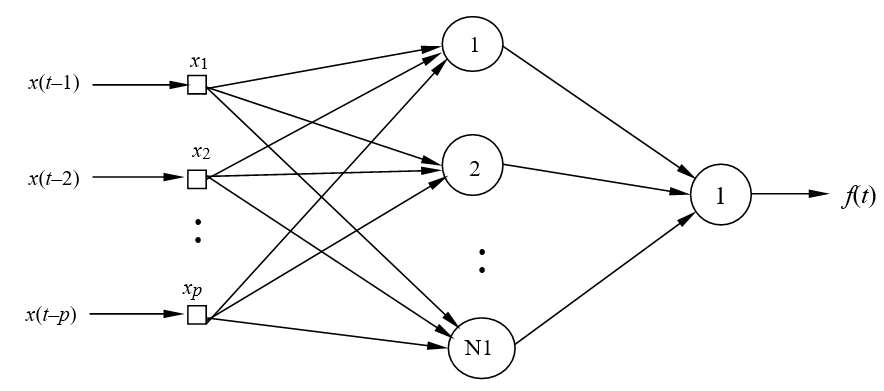



*Fonte*:  SILVA, I.N. – Sistemas Inteligentes – Notas de Aula da disciplina **Redes Neurais Artificiais** – USP São Carlos, 2012

## TDNN - inicio

# 2.1 - Configuração dos hiperparâmetros

In [14]:
#CÉLULA TDNN-MAIN-01

#IMPLEMENTE O CÓDIGO AQUI - INICIO

#Parâmetros
alpha    = 0.8
eta      = 0.001
epsilon  = 0.0000005
nInputs  = 5
nHidden  = 10
nOutputs = 1
max_epochs = 20000
dictLayers = {'nLayers':2, 'vLayers':np.array([nInputs, nHidden, nOutputs])}

# 2.2 - Carga dos dados e execução do treinamento

In [15]:
#CÉLULA TDNN-MAIN-01

#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS
# 2 - FAÇA O JANELAMENTO DOS DADOS DE ENTRADA
# 3 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 4 - EXECUTE O TREINAMENTO E VERIFIQUE A CONVERGÊNCIA

#Carrega dados - Treino
dfTrainingFile = loadDataFile('ds_stock_price_training.csv')
# dfTrainingFile.drop(columns=('Amostra'), inplace=True)

vInputsTrain = np.array(dfTrainingFile['x1']).reshape(-1, 1)
X = tdnn_windowing2(nInputs, vInputsTrain)

vInputsTrain  = X[:, 0:nInputs]
vOutputsTrain = X[:, nInputs + nOutputs - 1].reshape(-1, nOutputs)

nSamples = len (vInputsTrain)

# (W_1, W_2, B_1, B_2, MSE) = tdnn_train_batch(eta, epsilon, vInputsTrain.T, vOutputsTrain.T, dictLayers, max_epochs)
(W_1, W_2, B_1, B_2, MSE) = tdnn_train_online(eta, epsilon, vInputsTrain.T, vOutputsTrain.T, dictLayers, max_epochs)

# print(W_1)
# print('-----')
# print(W_2)

Epoch = 0 - MSE = 0.2501579082788868
Epoch = 1 - MSE = 0.25015318398872066
Epoch = 2 - MSE = 0.2501484422757201
Epoch = 3 - MSE = 0.2501436830438789
Epoch = 4 - MSE = 0.25013890619648704
Epoch = 5 - MSE = 0.25013411163612376
Epoch = 6 - MSE = 0.25012929926465205
Epoch = 7 - MSE = 0.2501244689832112
Epoch = 8 - MSE = 0.2501196206922108
Epoch = 9 - MSE = 0.25011475429132324
Epoch = 10 - MSE = 0.25010986967947785
Epoch = 11 - MSE = 0.25010496675485333
Epoch = 12 - MSE = 0.2501000454148709
Epoch = 13 - MSE = 0.25009510555618725
Epoch = 14 - MSE = 0.2500901470746881
Epoch = 15 - MSE = 0.2500851698654798
Epoch = 16 - MSE = 0.2500801738228832
Epoch = 17 - MSE = 0.2500751588404254
Epoch = 18 - MSE = 0.2500701248108331
Epoch = 19 - MSE = 0.2500650716260247
Epoch = 20 - MSE = 0.25005999917710214
Epoch = 21 - MSE = 0.25005490735434455
Epoch = 22 - MSE = 0.25004979604719907
Epoch = 23 - MSE = 0.25004466514427415
Epoch = 24 - MSE = 0.2500395145333307
Epoch = 25 - MSE = 0.2500343441012744
Epoch = 26

Epoch = 210 - MSE = 0.248548603745868
Epoch = 211 - MSE = 0.24853613347466422
Epoch = 212 - MSE = 0.24852358911987976
Epoch = 213 - MSE = 0.24851097002511954
Epoch = 214 - MSE = 0.24849827552626053
Epoch = 215 - MSE = 0.24848550495133864
Epoch = 216 - MSE = 0.24847265762043386
Epoch = 217 - MSE = 0.24845973284555123
Epoch = 218 - MSE = 0.24844672993050318
Epoch = 219 - MSE = 0.24843364817078614
Epoch = 220 - MSE = 0.24842048685345794
Epoch = 221 - MSE = 0.248407245257011
Epoch = 222 - MSE = 0.24839392265124408
Epoch = 223 - MSE = 0.24838051829713217
Epoch = 224 - MSE = 0.24836703144669264
Epoch = 225 - MSE = 0.24835346134285086
Epoch = 226 - MSE = 0.2483398072193013
Epoch = 227 - MSE = 0.24832606830036819
Epoch = 228 - MSE = 0.24831224380086175
Epoch = 229 - MSE = 0.24829833292593342
Epoch = 230 - MSE = 0.2482843348709272
Epoch = 231 - MSE = 0.24827024882122894
Epoch = 232 - MSE = 0.2482560739521125
Epoch = 233 - MSE = 0.2482418094285834
Epoch = 234 - MSE = 0.24822745440521948
Epoch = 

Epoch = 419 - MSE = 0.24186691995329135
Epoch = 420 - MSE = 0.24178510102269168
Epoch = 421 - MSE = 0.2417020778528777
Epoch = 422 - MSE = 0.24161782426858022
Epoch = 423 - MSE = 0.2415323133444709
Epoch = 424 - MSE = 0.24144551737854167
Epoch = 425 - MSE = 0.2413574078643583
Epoch = 426 - MSE = 0.2412679554621355
Epoch = 427 - MSE = 0.24117712996857324
Epoch = 428 - MSE = 0.2410849002853944
Epoch = 429 - MSE = 0.24099123438651918
Epoch = 430 - MSE = 0.24089609928380618
Epoch = 431 - MSE = 0.24079946099129015
Epoch = 432 - MSE = 0.24070128448783823
Epoch = 433 - MSE = 0.2406015336781441
Epoch = 434 - MSE = 0.2405001713519764
Epoch = 435 - MSE = 0.24039715914158738
Epoch = 436 - MSE = 0.24029245747719014
Epoch = 437 - MSE = 0.24018602554039914
Epoch = 438 - MSE = 0.24007782121552998
Epoch = 439 - MSE = 0.23996780103864165
Epoch = 440 - MSE = 0.23985592014420257
Epoch = 441 - MSE = 0.23974213220925156
Epoch = 442 - MSE = 0.23962638939491765
Epoch = 443 - MSE = 0.23950864228515548
Epoch =

Epoch = 626 - MSE = 0.025353364984759118
Epoch = 627 - MSE = 0.025320598413432614
Epoch = 628 - MSE = 0.02529027796889322
Epoch = 629 - MSE = 0.025262210008286424
Epoch = 630 - MSE = 0.02523621702941998
Epoch = 631 - MSE = 0.025212136244890868
Epoch = 632 - MSE = 0.02518981828993548
Epoch = 633 - MSE = 0.025169126050751285
Epoch = 634 - MSE = 0.025149933601410403
Epoch = 635 - MSE = 0.02513212523871078
Epoch = 636 - MSE = 0.0251155946054076
Epoch = 637 - MSE = 0.025100243893246825
Epoch = 638 - MSE = 0.025085983118098718
Epoch = 639 - MSE = 0.025072729460272274
Epoch = 640 - MSE = 0.025060406663791633
Epoch = 641 - MSE = 0.02504894448904199
Epoch = 642 - MSE = 0.0250382782137528
Epoch = 643 - MSE = 0.02502834817778798
Epoch = 644 - MSE = 0.025019099367661946
Epoch = 645 - MSE = 0.02501048103710284
Epoch = 646 - MSE = 0.025002446360345227
Epoch = 647 - MSE = 0.02499495211515784
Epoch = 648 - MSE = 0.024987958392902514
Epoch = 649 - MSE = 0.024981428333181212
Epoch = 650 - MSE = 0.024975

Epoch = 835 - MSE = 0.02480411644238808
Epoch = 836 - MSE = 0.024803588829309556
Epoch = 837 - MSE = 0.024803061197058923
Epoch = 838 - MSE = 0.024802533545491248
Epoch = 839 - MSE = 0.02480200587446602
Epoch = 840 - MSE = 0.02480147818384692
Epoch = 841 - MSE = 0.024800950473501494
Epoch = 842 - MSE = 0.024800422743301014
Epoch = 843 - MSE = 0.024799894993120214
Epoch = 844 - MSE = 0.024799367222837102
Epoch = 845 - MSE = 0.02479883943233274
Epoch = 846 - MSE = 0.02479831162149116
Epoch = 847 - MSE = 0.02479778379019905
Epoch = 848 - MSE = 0.024797255938345777
Epoch = 849 - MSE = 0.02479672806582308
Epoch = 850 - MSE = 0.024796200172525016
Epoch = 851 - MSE = 0.024795672258347855
Epoch = 852 - MSE = 0.024795144323189845
Epoch = 853 - MSE = 0.02479461636695124
Epoch = 854 - MSE = 0.024794088389534112
Epoch = 855 - MSE = 0.024793560390842247
Epoch = 856 - MSE = 0.02479303237078106
Epoch = 857 - MSE = 0.024792504329257586
Epoch = 858 - MSE = 0.024791976266180227
Epoch = 859 - MSE = 0.024

Epoch = 1037 - MSE = 0.024697037254760624
Epoch = 1038 - MSE = 0.02469650419993862
Epoch = 1039 - MSE = 0.024695971111734306
Epoch = 1040 - MSE = 0.02469543799008681
Epoch = 1041 - MSE = 0.02469490483493529
Epoch = 1042 - MSE = 0.024694371646218908
Epoch = 1043 - MSE = 0.024693838423876853
Epoch = 1044 - MSE = 0.02469330516784832
Epoch = 1045 - MSE = 0.024692771878072506
Epoch = 1046 - MSE = 0.024692238554488634
Epoch = 1047 - MSE = 0.024691705197035913
Epoch = 1048 - MSE = 0.024691171805653597
Epoch = 1049 - MSE = 0.024690638380280922
Epoch = 1050 - MSE = 0.024690104920857152
Epoch = 1051 - MSE = 0.024689571427321557
Epoch = 1052 - MSE = 0.024689037899613415
Epoch = 1053 - MSE = 0.02468850433767203
Epoch = 1054 - MSE = 0.02468797074143669
Epoch = 1055 - MSE = 0.024687437110846717
Epoch = 1056 - MSE = 0.02468690344584142
Epoch = 1057 - MSE = 0.024686369746360157
Epoch = 1058 - MSE = 0.024685836012342272
Epoch = 1059 - MSE = 0.0246853022437271
Epoch = 1060 - MSE = 0.02468476844045404
Ep

Epoch = 1237 - MSE = 0.02458968273019017
Epoch = 1238 - MSE = 0.024589141801352448
Epoch = 1239 - MSE = 0.024588600827159926
Epoch = 1240 - MSE = 0.02458805980755362
Epoch = 1241 - MSE = 0.0245875187424746
Epoch = 1242 - MSE = 0.024586977631863925
Epoch = 1243 - MSE = 0.024586436475662648
Epoch = 1244 - MSE = 0.02458589527381187
Epoch = 1245 - MSE = 0.024585354026252663
Epoch = 1246 - MSE = 0.0245848127329261
Epoch = 1247 - MSE = 0.024584271393773317
Epoch = 1248 - MSE = 0.024583730008735413
Epoch = 1249 - MSE = 0.024583188577753472
Epoch = 1250 - MSE = 0.024582647100768674
Epoch = 1251 - MSE = 0.024582105577722113
Epoch = 1252 - MSE = 0.02458156400855495
Epoch = 1253 - MSE = 0.024581022393208318
Epoch = 1254 - MSE = 0.024580480731623392
Epoch = 1255 - MSE = 0.024579939023741317
Epoch = 1256 - MSE = 0.024579397269503294
Epoch = 1257 - MSE = 0.024578855468850493
Epoch = 1258 - MSE = 0.024578313621724097
Epoch = 1259 - MSE = 0.024577771728065318
Epoch = 1260 - MSE = 0.024577229787815357


Epoch = 1441 - MSE = 0.024478312482879672
Epoch = 1442 - MSE = 0.024477761091708853
Epoch = 1443 - MSE = 0.02447720964331313
Epoch = 1444 - MSE = 0.024476658137635054
Epoch = 1445 - MSE = 0.02447610657461713
Epoch = 1446 - MSE = 0.02447555495420192
Epoch = 1447 - MSE = 0.02447500327633195
Epoch = 1448 - MSE = 0.024474451540949762
Epoch = 1449 - MSE = 0.02447389974799794
Epoch = 1450 - MSE = 0.02447334789741903
Epoch = 1451 - MSE = 0.024472795989155614
Epoch = 1452 - MSE = 0.024472244023150253
Epoch = 1453 - MSE = 0.024471691999345523
Epoch = 1454 - MSE = 0.024471139917684046
Epoch = 1455 - MSE = 0.02447058777810839
Epoch = 1456 - MSE = 0.024470035580561145
Epoch = 1457 - MSE = 0.024469483324984945
Epoch = 1458 - MSE = 0.024468931011322397
Epoch = 1459 - MSE = 0.02446837863951611
Epoch = 1460 - MSE = 0.024467826209508707
Epoch = 1461 - MSE = 0.02446727372124283
Epoch = 1462 - MSE = 0.02446672117466111
Epoch = 1463 - MSE = 0.024466168569706202
Epoch = 1464 - MSE = 0.02446561590632075
Epo

Epoch = 1639 - MSE = 0.02436794811301963
Epoch = 1640 - MSE = 0.024367384277942637
Epoch = 1641 - MSE = 0.024366820374373814
Epoch = 1642 - MSE = 0.02436625640225676
Epoch = 1643 - MSE = 0.024365692361535102
Epoch = 1644 - MSE = 0.02436512825215249
Epoch = 1645 - MSE = 0.024364564074052523
Epoch = 1646 - MSE = 0.024363999827178892
Epoch = 1647 - MSE = 0.02436343551147519
Epoch = 1648 - MSE = 0.0243628711268851
Epoch = 1649 - MSE = 0.024362306673352284
Epoch = 1650 - MSE = 0.02436174215082038
Epoch = 1651 - MSE = 0.024361177559233047
Epoch = 1652 - MSE = 0.024360612898533994
Epoch = 1653 - MSE = 0.024360048168666857
Epoch = 1654 - MSE = 0.024359483369575333
Epoch = 1655 - MSE = 0.024358918501203107
Epoch = 1656 - MSE = 0.02435835356349384
Epoch = 1657 - MSE = 0.024357788556391265
Epoch = 1658 - MSE = 0.024357223479839058
Epoch = 1659 - MSE = 0.024356658333780933
Epoch = 1660 - MSE = 0.02435609311816059
Epoch = 1661 - MSE = 0.02435552783292173
Epoch = 1662 - MSE = 0.02435496247800809
Epo

Epoch = 1842 - MSE = 0.024252008168440028
Epoch = 1843 - MSE = 0.02425142927972812
Epoch = 1844 - MSE = 0.024250850311168862
Epoch = 1845 - MSE = 0.02425027126270677
Epoch = 1846 - MSE = 0.02424969213428627
Epoch = 1847 - MSE = 0.024249112925851857
Epoch = 1848 - MSE = 0.024248533637347983
Epoch = 1849 - MSE = 0.02424795426871914
Epoch = 1850 - MSE = 0.02424737481990981
Epoch = 1851 - MSE = 0.024246795290864476
Epoch = 1852 - MSE = 0.024246215681527624
Epoch = 1853 - MSE = 0.024245635991843737
Epoch = 1854 - MSE = 0.024245056221757315
Epoch = 1855 - MSE = 0.024244476371212863
Epoch = 1856 - MSE = 0.024243896440154882
Epoch = 1857 - MSE = 0.02424331642852787
Epoch = 1858 - MSE = 0.02424273633627633
Epoch = 1859 - MSE = 0.0242421561633448
Epoch = 1860 - MSE = 0.024241575909677772
Epoch = 1861 - MSE = 0.02424099557521977
Epoch = 1862 - MSE = 0.024240415159915322
Epoch = 1863 - MSE = 0.024239834663708937
Epoch = 1864 - MSE = 0.02423925408654517
Epoch = 1865 - MSE = 0.024238673428368544
Epo

Epoch = 2041 - MSE = 0.024135164606233356
Epoch = 2042 - MSE = 0.024134568738026767
Epoch = 2043 - MSE = 0.024133972778984245
Epoch = 2044 - MSE = 0.024133376729050856
Epoch = 2045 - MSE = 0.024132780588171657
Epoch = 2046 - MSE = 0.024132184356291733
Epoch = 2047 - MSE = 0.024131588033356164
Epoch = 2048 - MSE = 0.024130991619310028
Epoch = 2049 - MSE = 0.024130395114098424
Epoch = 2050 - MSE = 0.024129798517666418
Epoch = 2051 - MSE = 0.02412920182995911
Epoch = 2052 - MSE = 0.02412860505092159
Epoch = 2053 - MSE = 0.02412800818049896
Epoch = 2054 - MSE = 0.024127411218636298
Epoch = 2055 - MSE = 0.024126814165278725
Epoch = 2056 - MSE = 0.024126217020371325
Epoch = 2057 - MSE = 0.0241256197838592
Epoch = 2058 - MSE = 0.024125022455687487
Epoch = 2059 - MSE = 0.024124425035801273
Epoch = 2060 - MSE = 0.024123827524145665
Epoch = 2061 - MSE = 0.024123229920665786
Epoch = 2062 - MSE = 0.024122632225306757
Epoch = 2063 - MSE = 0.02412203443801369
Epoch = 2064 - MSE = 0.02412143655873170

Epoch = 2238 - MSE = 0.02401595611141779
Epoch = 2239 - MSE = 0.02401534129113213
Epoch = 2240 - MSE = 0.024014726369235573
Epoch = 2241 - MSE = 0.024014111345673654
Epoch = 2242 - MSE = 0.02401349622039186
Epoch = 2243 - MSE = 0.024012880993335754
Epoch = 2244 - MSE = 0.024012265664450846
Epoch = 2245 - MSE = 0.024011650233682656
Epoch = 2246 - MSE = 0.02401103470097674
Epoch = 2247 - MSE = 0.0240104190662786
Epoch = 2248 - MSE = 0.02400980332953379
Epoch = 2249 - MSE = 0.024009187490687842
Epoch = 2250 - MSE = 0.024008571549686306
Epoch = 2251 - MSE = 0.02400795550647471
Epoch = 2252 - MSE = 0.02400733936099859
Epoch = 2253 - MSE = 0.024006723113203506
Epoch = 2254 - MSE = 0.024006106763035
Epoch = 2255 - MSE = 0.024005490310438624
Epoch = 2256 - MSE = 0.024004873755359906
Epoch = 2257 - MSE = 0.024004257097744425
Epoch = 2258 - MSE = 0.02400364033753772
Epoch = 2259 - MSE = 0.02400302347468536
Epoch = 2260 - MSE = 0.024002406509132903
Epoch = 2261 - MSE = 0.0240017894408259
Epoch = 

Epoch = 2445 - MSE = 0.023886442636019158
Epoch = 2446 - MSE = 0.0238858056234898
Epoch = 2447 - MSE = 0.023885168498112175
Epoch = 2448 - MSE = 0.02388453125983215
Epoch = 2449 - MSE = 0.023883893908595633
Epoch = 2450 - MSE = 0.023883256444348525
Epoch = 2451 - MSE = 0.02388261886703674
Epoch = 2452 - MSE = 0.023881981176606157
Epoch = 2453 - MSE = 0.023881343373002694
Epoch = 2454 - MSE = 0.023880705456172255
Epoch = 2455 - MSE = 0.023880067426060747
Epoch = 2456 - MSE = 0.023879429282614082
Epoch = 2457 - MSE = 0.023878791025778164
Epoch = 2458 - MSE = 0.023878152655498912
Epoch = 2459 - MSE = 0.02387751417172224
Epoch = 2460 - MSE = 0.023876875574394076
Epoch = 2461 - MSE = 0.02387623686346032
Epoch = 2462 - MSE = 0.0238755980388669
Epoch = 2463 - MSE = 0.023874959100559742
Epoch = 2464 - MSE = 0.023874320048484762
Epoch = 2465 - MSE = 0.023873680882587883
Epoch = 2466 - MSE = 0.023873041602815035
Epoch = 2467 - MSE = 0.02387240220911215
Epoch = 2468 - MSE = 0.02387176270142514
Ep

Epoch = 2655 - MSE = 0.023750111360769426
Epoch = 2656 - MSE = 0.023749449465332206
Epoch = 2657 - MSE = 0.023748787445721543
Epoch = 2658 - MSE = 0.023748125301883687
Epoch = 2659 - MSE = 0.023747463033764876
Epoch = 2660 - MSE = 0.023746800641311384
Epoch = 2661 - MSE = 0.02374613812446943
Epoch = 2662 - MSE = 0.0237454754831853
Epoch = 2663 - MSE = 0.023744812717405236
Epoch = 2664 - MSE = 0.023744149827075494
Epoch = 2665 - MSE = 0.023743486812142358
Epoch = 2666 - MSE = 0.02374282367255206
Epoch = 2667 - MSE = 0.023742160408250883
Epoch = 2668 - MSE = 0.023741497019185088
Epoch = 2669 - MSE = 0.02374083350530093
Epoch = 2670 - MSE = 0.0237401698665447
Epoch = 2671 - MSE = 0.02373950610286266
Epoch = 2672 - MSE = 0.023738842214201073
Epoch = 2673 - MSE = 0.02373817820050622
Epoch = 2674 - MSE = 0.02373751406172438
Epoch = 2675 - MSE = 0.02373684979780183
Epoch = 2676 - MSE = 0.023736185408684846
Epoch = 2677 - MSE = 0.023735520894319722
Epoch = 2678 - MSE = 0.023734856254652725
Epo

Epoch = 2853 - MSE = 0.023616565930327876
Epoch = 2854 - MSE = 0.023615878402528878
Epoch = 2855 - MSE = 0.023615190739949405
Epoch = 2856 - MSE = 0.02361450294253608
Epoch = 2857 - MSE = 0.023613815010235538
Epoch = 2858 - MSE = 0.0236131269429944
Epoch = 2859 - MSE = 0.02361243874075929
Epoch = 2860 - MSE = 0.023611750403476853
Epoch = 2861 - MSE = 0.023611061931093733
Epoch = 2862 - MSE = 0.023610373323556547
Epoch = 2863 - MSE = 0.02360968458081196
Epoch = 2864 - MSE = 0.023608995702806584
Epoch = 2865 - MSE = 0.023608306689487102
Epoch = 2866 - MSE = 0.023607617540800124
Epoch = 2867 - MSE = 0.023606928256692323
Epoch = 2868 - MSE = 0.023606238837110344
Epoch = 2869 - MSE = 0.023605549282000836
Epoch = 2870 - MSE = 0.02360485959131045
Epoch = 2871 - MSE = 0.02360416976498586
Epoch = 2872 - MSE = 0.023603479802973726
Epoch = 2873 - MSE = 0.023602789705220686
Epoch = 2874 - MSE = 0.023602099471673414
Epoch = 2875 - MSE = 0.023601409102278592
Epoch = 2876 - MSE = 0.023600718596982873

Epoch = 3060 - MSE = 0.02347129642698753
Epoch = 3061 - MSE = 0.023470579864998602
Epoch = 3062 - MSE = 0.023469863157231378
Epoch = 3063 - MSE = 0.023469146303633
Epoch = 3064 - MSE = 0.023468429304150613
Epoch = 3065 - MSE = 0.023467712158731384
Epoch = 3066 - MSE = 0.023466994867322462
Epoch = 3067 - MSE = 0.023466277429870994
Epoch = 3068 - MSE = 0.02346555984632416
Epoch = 3069 - MSE = 0.023464842116629123
Epoch = 3070 - MSE = 0.023464124240733034
Epoch = 3071 - MSE = 0.02346340621858308
Epoch = 3072 - MSE = 0.023462688050126433
Epoch = 3073 - MSE = 0.023461969735310277
Epoch = 3074 - MSE = 0.02346125127408176
Epoch = 3075 - MSE = 0.023460532666388107
Epoch = 3076 - MSE = 0.023459813912176473
Epoch = 3077 - MSE = 0.02345909501139406
Epoch = 3078 - MSE = 0.023458375963988053
Epoch = 3079 - MSE = 0.023457656769905657
Epoch = 3080 - MSE = 0.023456937429094066
Epoch = 3081 - MSE = 0.023456217941500483
Epoch = 3082 - MSE = 0.023455498307072106
Epoch = 3083 - MSE = 0.023454778525756153


Epoch = 3270 - MSE = 0.023317539139740304
Epoch = 3271 - MSE = 0.023316790809416135
Epoch = 3272 - MSE = 0.023316042322288504
Epoch = 3273 - MSE = 0.02331529367830532
Epoch = 3274 - MSE = 0.02331454487741449
Epoch = 3275 - MSE = 0.023313795919563923
Epoch = 3276 - MSE = 0.023313046804701542
Epoch = 3277 - MSE = 0.023312297532775257
Epoch = 3278 - MSE = 0.023311548103732975
Epoch = 3279 - MSE = 0.02331079851752265
Epoch = 3280 - MSE = 0.023310048774092207
Epoch = 3281 - MSE = 0.02330929887338957
Epoch = 3282 - MSE = 0.0233085488153627
Epoch = 3283 - MSE = 0.023307798599959507
Epoch = 3284 - MSE = 0.02330704822712799
Epoch = 3285 - MSE = 0.02330629769681605
Epoch = 3286 - MSE = 0.02330554700897168
Epoch = 3287 - MSE = 0.02330479616354283
Epoch = 3288 - MSE = 0.023304045160477464
Epoch = 3289 - MSE = 0.023303293999723567
Epoch = 3290 - MSE = 0.023302542681229096
Epoch = 3291 - MSE = 0.02330179120494204
Epoch = 3292 - MSE = 0.023301039570810384
Epoch = 3293 - MSE = 0.02330028777878212
Epoc

Epoch = 3476 - MSE = 0.023159997720135942
Epoch = 3477 - MSE = 0.023159215994988904
Epoch = 3478 - MSE = 0.023158434102408452
Epoch = 3479 - MSE = 0.023157652042343563
Epoch = 3480 - MSE = 0.0231568698147432
Epoch = 3481 - MSE = 0.023156087419556347
Epoch = 3482 - MSE = 0.023155304856731975
Epoch = 3483 - MSE = 0.02315452212621907
Epoch = 3484 - MSE = 0.023153739227966624
Epoch = 3485 - MSE = 0.02315295616192365
Epoch = 3486 - MSE = 0.023152172928039127
Epoch = 3487 - MSE = 0.023151389526262094
Epoch = 3488 - MSE = 0.023150605956541552
Epoch = 3489 - MSE = 0.023149822218826537
Epoch = 3490 - MSE = 0.02314903831306606
Epoch = 3491 - MSE = 0.023148254239209173
Epoch = 3492 - MSE = 0.02314746999720491
Epoch = 3493 - MSE = 0.023146685587002322
Epoch = 3494 - MSE = 0.02314590100855047
Epoch = 3495 - MSE = 0.0231451162617984
Epoch = 3496 - MSE = 0.023144331346695194
Epoch = 3497 - MSE = 0.023143546263189915
Epoch = 3498 - MSE = 0.023142761011231656
Epoch = 3499 - MSE = 0.023141975590769484
E

Epoch = 3686 - MSE = 0.022992083972321806
Epoch = 3687 - MSE = 0.022991265976246202
Epoch = 3688 - MSE = 0.022990447802169373
Epoch = 3689 - MSE = 0.022989629450041817
Epoch = 3690 - MSE = 0.02298881091981402
Epoch = 3691 - MSE = 0.022987992211436468
Epoch = 3692 - MSE = 0.02298717332485969
Epoch = 3693 - MSE = 0.022986354260034193
Epoch = 3694 - MSE = 0.022985535016910506
Epoch = 3695 - MSE = 0.02298471559543917
Epoch = 3696 - MSE = 0.022983895995570713
Epoch = 3697 - MSE = 0.02298307621725569
Epoch = 3698 - MSE = 0.022982256260444672
Epoch = 3699 - MSE = 0.022981436125088225
Epoch = 3700 - MSE = 0.022980615811136914
Epoch = 3701 - MSE = 0.022979795318541336
Epoch = 3702 - MSE = 0.02297897464725209
Epoch = 3703 - MSE = 0.022978153797219767
Epoch = 3704 - MSE = 0.022977332768394976
Epoch = 3705 - MSE = 0.022976511560728354
Epoch = 3706 - MSE = 0.022975690174170515
Epoch = 3707 - MSE = 0.02297486860867212
Epoch = 3708 - MSE = 0.022974046864183785
Epoch = 3709 - MSE = 0.02297322494065619

Epoch = 3888 - MSE = 0.02282316875397849
Epoch = 3889 - MSE = 0.022822313808821153
Epoch = 3890 - MSE = 0.022821458675851097
Epoch = 3891 - MSE = 0.022820603355020792
Epoch = 3892 - MSE = 0.02281974784628274
Epoch = 3893 - MSE = 0.02281889214958943
Epoch = 3894 - MSE = 0.0228180362648934
Epoch = 3895 - MSE = 0.022817180192147155
Epoch = 3896 - MSE = 0.022816323931303242
Epoch = 3897 - MSE = 0.022815467482314198
Epoch = 3898 - MSE = 0.022814610845132602
Epoch = 3899 - MSE = 0.022813754019711013
Epoch = 3900 - MSE = 0.022812897006002017
Epoch = 3901 - MSE = 0.022812039803958205
Epoch = 3902 - MSE = 0.022811182413532197
Epoch = 3903 - MSE = 0.0228103248346766
Epoch = 3904 - MSE = 0.022809467067344043
Epoch = 3905 - MSE = 0.022808609111487167
Epoch = 3906 - MSE = 0.022807750967058636
Epoch = 3907 - MSE = 0.022806892634011103
Epoch = 3908 - MSE = 0.022806034112297254
Epoch = 3909 - MSE = 0.02280517540186977
Epoch = 3910 - MSE = 0.02280431650268134
Epoch = 3911 - MSE = 0.022803457414684696
E

Epoch = 4088 - MSE = 0.022648380615066056
Epoch = 4089 - MSE = 0.022647487177742814
Epoch = 4090 - MSE = 0.022646593543351305
Epoch = 4091 - MSE = 0.022645699711846635
Epoch = 4092 - MSE = 0.02264480568318389
Epoch = 4093 - MSE = 0.022643911457318207
Epoch = 4094 - MSE = 0.022643017034204724
Epoch = 4095 - MSE = 0.022642122413798586
Epoch = 4096 - MSE = 0.022641227596054962
Epoch = 4097 - MSE = 0.022640332580929037
Epoch = 4098 - MSE = 0.02263943736837601
Epoch = 4099 - MSE = 0.02263854195835109
Epoch = 4100 - MSE = 0.022637646350809497
Epoch = 4101 - MSE = 0.022636750545706484
Epoch = 4102 - MSE = 0.0226358545429973
Epoch = 4103 - MSE = 0.022634958342637228
Epoch = 4104 - MSE = 0.022634061944581545
Epoch = 4105 - MSE = 0.022633165348785556
Epoch = 4106 - MSE = 0.02263226855520458
Epoch = 4107 - MSE = 0.022631371563793946
Epoch = 4108 - MSE = 0.02263047437450901
Epoch = 4109 - MSE = 0.022629576987305132
Epoch = 4110 - MSE = 0.022628679402137686
Epoch = 4111 - MSE = 0.022627781618962055

Epoch = 4303 - MSE = 0.022451686042346368
Epoch = 4304 - MSE = 0.022450749228205634
Epoch = 4305 - MSE = 0.022449812207715462
Epoch = 4306 - MSE = 0.02244887498083458
Epoch = 4307 - MSE = 0.022447937547521783
Epoch = 4308 - MSE = 0.02244699990773582
Epoch = 4309 - MSE = 0.022446062061435523
Epoch = 4310 - MSE = 0.0224451240085797
Epoch = 4311 - MSE = 0.022444185749127196
Epoch = 4312 - MSE = 0.02244324728303688
Epoch = 4313 - MSE = 0.022442308610267626
Epoch = 4314 - MSE = 0.02244136973077834
Epoch = 4315 - MSE = 0.022440430644527932
Epoch = 4316 - MSE = 0.022439491351475358
Epoch = 4317 - MSE = 0.022438551851579565
Epoch = 4318 - MSE = 0.022437612144799536
Epoch = 4319 - MSE = 0.022436672231094273
Epoch = 4320 - MSE = 0.02243573211042279
Epoch = 4321 - MSE = 0.022434791782744122
Epoch = 4322 - MSE = 0.02243385124801733
Epoch = 4323 - MSE = 0.02243291050620149
Epoch = 4324 - MSE = 0.0224319695572557
Epoch = 4325 - MSE = 0.022431028401139076
Epoch = 4326 - MSE = 0.022430087037810752
Epo

Epoch = 4515 - MSE = 0.022248403299392695
Epoch = 4516 - MSE = 0.022247421848539957
Epoch = 4517 - MSE = 0.022246440183059258
Epoch = 4518 - MSE = 0.02224545830291395
Epoch = 4519 - MSE = 0.02224447620806741
Epoch = 4520 - MSE = 0.022243493898483045
Epoch = 4521 - MSE = 0.022242511374124283
Epoch = 4522 - MSE = 0.022241528634954575
Epoch = 4523 - MSE = 0.022240545680937404
Epoch = 4524 - MSE = 0.022239562512036272
Epoch = 4525 - MSE = 0.022238579128214704
Epoch = 4526 - MSE = 0.022237595529436247
Epoch = 4527 - MSE = 0.022236611715664486
Epoch = 4528 - MSE = 0.02223562768686302
Epoch = 4529 - MSE = 0.02223464344299546
Epoch = 4530 - MSE = 0.022233658984025476
Epoch = 4531 - MSE = 0.022232674309916736
Epoch = 4532 - MSE = 0.022231689420632927
Epoch = 4533 - MSE = 0.022230704316137787
Epoch = 4534 - MSE = 0.022229718996395063
Epoch = 4535 - MSE = 0.02222873346136852
Epoch = 4536 - MSE = 0.02222774771102197
Epoch = 4537 - MSE = 0.022226761745319217
Epoch = 4538 - MSE = 0.02222577556422412

Epoch = 4718 - MSE = 0.022044719665392412
Epoch = 4719 - MSE = 0.02204369392900926
Epoch = 4720 - MSE = 0.02204266797109505
Epoch = 4721 - MSE = 0.02204164179161862
Epoch = 4722 - MSE = 0.022040615390548846
Epoch = 4723 - MSE = 0.022039588767854636
Epoch = 4724 - MSE = 0.022038561923504934
Epoch = 4725 - MSE = 0.0220375348574687
Epoch = 4726 - MSE = 0.02203650756971493
Epoch = 4727 - MSE = 0.022035480060212654
Epoch = 4728 - MSE = 0.022034452328930927
Epoch = 4729 - MSE = 0.02203342437583883
Epoch = 4730 - MSE = 0.0220323962009055
Epoch = 4731 - MSE = 0.022031367804100064
Epoch = 4732 - MSE = 0.0220303391853917
Epoch = 4733 - MSE = 0.022029310344749635
Epoch = 4734 - MSE = 0.022028281282143083
Epoch = 4735 - MSE = 0.02202725199754133
Epoch = 4736 - MSE = 0.022026222490913665
Epoch = 4737 - MSE = 0.022025192762229417
Epoch = 4738 - MSE = 0.02202416281145794
Epoch = 4739 - MSE = 0.022023132638568636
Epoch = 4740 - MSE = 0.022022102243530916
Epoch = 4741 - MSE = 0.022021071626314236
Epoch

Epoch = 4921 - MSE = 0.021831912465216846
Epoch = 4922 - MSE = 0.02183084116235086
Epoch = 4923 - MSE = 0.021829769632282708
Epoch = 4924 - MSE = 0.021828697874987927
Epoch = 4925 - MSE = 0.021827625890442064
Epoch = 4926 - MSE = 0.02182655367862072
Epoch = 4927 - MSE = 0.021825481239499515
Epoch = 4928 - MSE = 0.021824408573054108
Epoch = 4929 - MSE = 0.02182333567926022
Epoch = 4930 - MSE = 0.021822262558093566
Epoch = 4931 - MSE = 0.021821189209529926
Epoch = 4932 - MSE = 0.02182011563354511
Epoch = 4933 - MSE = 0.021819041830114957
Epoch = 4934 - MSE = 0.021817967799215354
Epoch = 4935 - MSE = 0.02181689354082221
Epoch = 4936 - MSE = 0.021815819054911492
Epoch = 4937 - MSE = 0.021814744341459174
Epoch = 4938 - MSE = 0.021813669400441306
Epoch = 4939 - MSE = 0.021812594231833914
Epoch = 4940 - MSE = 0.021811518835613133
Epoch = 4941 - MSE = 0.021810443211755078
Epoch = 4942 - MSE = 0.021809367360235928
Epoch = 4943 - MSE = 0.021808291281031893
Epoch = 4944 - MSE = 0.0218072149741192

Epoch = 5133 - MSE = 0.021599679379356477
Epoch = 5134 - MSE = 0.021598559421055017
Epoch = 5135 - MSE = 0.021597439231216528
Epoch = 5136 - MSE = 0.021596318809824887
Epoch = 5137 - MSE = 0.021595198156863997
Epoch = 5138 - MSE = 0.021594077272317824
Epoch = 5139 - MSE = 0.021592956156170358
Epoch = 5140 - MSE = 0.02159183480840563
Epoch = 5141 - MSE = 0.021590713229007737
Epoch = 5142 - MSE = 0.0215895914179608
Epoch = 5143 - MSE = 0.021588469375248994
Epoch = 5144 - MSE = 0.02158734710085653
Epoch = 5145 - MSE = 0.021586224594767656
Epoch = 5146 - MSE = 0.021585101856966677
Epoch = 5147 - MSE = 0.021583978887437936
Epoch = 5148 - MSE = 0.02158285568616582
Epoch = 5149 - MSE = 0.02158173225313476
Epoch = 5150 - MSE = 0.021580608588329216
Epoch = 5151 - MSE = 0.02157948469173371
Epoch = 5152 - MSE = 0.021578360563332805
Epoch = 5153 - MSE = 0.021577236203111104
Epoch = 5154 - MSE = 0.021576111611053248
Epoch = 5155 - MSE = 0.021574986787143927
Epoch = 5156 - MSE = 0.021573861731367872

Epoch = 5334 - MSE = 0.021369895277161682
Epoch = 5335 - MSE = 0.021368728515096674
Epoch = 5336 - MSE = 0.021367561519159552
Epoch = 5337 - MSE = 0.02136639428934347
Epoch = 5338 - MSE = 0.02136522682564167
Epoch = 5339 - MSE = 0.021364059128047418
Epoch = 5340 - MSE = 0.02136289119655404
Epoch = 5341 - MSE = 0.021361723031154904
Epoch = 5342 - MSE = 0.021360554631843425
Epoch = 5343 - MSE = 0.0213593859986131
Epoch = 5344 - MSE = 0.021358217131457427
Epoch = 5345 - MSE = 0.021357048030369984
Epoch = 5346 - MSE = 0.021355878695344402
Epoch = 5347 - MSE = 0.02135470912637435
Epoch = 5348 - MSE = 0.021353539323453553
Epoch = 5349 - MSE = 0.021352369286575777
Epoch = 5350 - MSE = 0.02135119901573485
Epoch = 5351 - MSE = 0.021350028510924643
Epoch = 5352 - MSE = 0.021348857772139077
Epoch = 5353 - MSE = 0.021347686799372136
Epoch = 5354 - MSE = 0.021346515592617837
Epoch = 5355 - MSE = 0.021345344151870255
Epoch = 5356 - MSE = 0.021344172477123512
Epoch = 5357 - MSE = 0.021343000568371795

Epoch = 5546 - MSE = 0.021117304437282967
Epoch = 5547 - MSE = 0.021116088022408906
Epoch = 5548 - MSE = 0.02111487137338308
Epoch = 5549 - MSE = 0.02111365449020999
Epoch = 5550 - MSE = 0.02111243737289419
Epoch = 5551 - MSE = 0.02111122002144029
Epoch = 5552 - MSE = 0.021110002435852974
Epoch = 5553 - MSE = 0.021108784616136977
Epoch = 5554 - MSE = 0.021107566562297075
Epoch = 5555 - MSE = 0.021106348274338126
Epoch = 5556 - MSE = 0.021105129752265025
Epoch = 5557 - MSE = 0.021103910996082734
Epoch = 5558 - MSE = 0.021102692005796272
Epoch = 5559 - MSE = 0.021101472781410714
Epoch = 5560 - MSE = 0.02110025332293119
Epoch = 5561 - MSE = 0.02109903363036289
Epoch = 5562 - MSE = 0.02109781370371107
Epoch = 5563 - MSE = 0.021096593542981018
Epoch = 5564 - MSE = 0.02109537314817812
Epoch = 5565 - MSE = 0.021094152519307786
Epoch = 5566 - MSE = 0.021092931656375487
Epoch = 5567 - MSE = 0.02109171055938677
Epoch = 5568 - MSE = 0.02109048922834722
Epoch = 5569 - MSE = 0.0210892676632625
Epoc

Epoch = 5756 - MSE = 0.02085673031381363
Epoch = 5757 - MSE = 0.020855464915506345
Epoch = 5758 - MSE = 0.020854199285298698
Epoch = 5759 - MSE = 0.02085293342320794
Epoch = 5760 - MSE = 0.02085166732925137
Epoch = 5761 - MSE = 0.02085040100344638
Epoch = 5762 - MSE = 0.020849134445810397
Epoch = 5763 - MSE = 0.020847867656360937
Epoch = 5764 - MSE = 0.02084660063511556
Epoch = 5765 - MSE = 0.020845333382091918
Epoch = 5766 - MSE = 0.02084406589730769
Epoch = 5767 - MSE = 0.020842798180780647
Epoch = 5768 - MSE = 0.020841530232528622
Epoch = 5769 - MSE = 0.020840262052569492
Epoch = 5770 - MSE = 0.020838993640921233
Epoch = 5771 - MSE = 0.02083772499760185
Epoch = 5772 - MSE = 0.020836456122629438
Epoch = 5773 - MSE = 0.020835187016022157
Epoch = 5774 - MSE = 0.020833917677798196
Epoch = 5775 - MSE = 0.020832648107975853
Epoch = 5776 - MSE = 0.020831378306573473
Epoch = 5777 - MSE = 0.020830108273609465
Epoch = 5778 - MSE = 0.02082883800910229
Epoch = 5779 - MSE = 0.0208275675130705
Ep

Epoch = 5965 - MSE = 0.020587252412069146
Epoch = 5966 - MSE = 0.020585939020281788
Epoch = 5967 - MSE = 0.020584625401642503
Epoch = 5968 - MSE = 0.020583311556182652
Epoch = 5969 - MSE = 0.02058199748393365
Epoch = 5970 - MSE = 0.020580683184926993
Epoch = 5971 - MSE = 0.020579368659194262
Epoch = 5972 - MSE = 0.020578053906767074
Epoch = 5973 - MSE = 0.020576738927677155
Epoch = 5974 - MSE = 0.020575423721956258
Epoch = 5975 - MSE = 0.02057410828963625
Epoch = 5976 - MSE = 0.020572792630749046
Epoch = 5977 - MSE = 0.020571476745326635
Epoch = 5978 - MSE = 0.020570160633401086
Epoch = 5979 - MSE = 0.020568844295004513
Epoch = 5980 - MSE = 0.020567527730169143
Epoch = 5981 - MSE = 0.020566210938927233
Epoch = 5982 - MSE = 0.020564893921311136
Epoch = 5983 - MSE = 0.02056357667735326
Epoch = 5984 - MSE = 0.020562259207086105
Epoch = 5985 - MSE = 0.02056094151054222
Epoch = 5986 - MSE = 0.020559623587754226
Epoch = 5987 - MSE = 0.020558305438754847
Epoch = 5988 - MSE = 0.020556987063576

Epoch = 6165 - MSE = 0.02032010552070014
Epoch = 6166 - MSE = 0.020318747477021202
Epoch = 6167 - MSE = 0.020317389214202494
Epoch = 6168 - MSE = 0.020316030732290023
Epoch = 6169 - MSE = 0.02031467203132987
Epoch = 6170 - MSE = 0.020313313111368202
Epoch = 6171 - MSE = 0.02031195397245127
Epoch = 6172 - MSE = 0.020310594614625376
Epoch = 6173 - MSE = 0.020309235037936912
Epoch = 6174 - MSE = 0.02030787524243235
Epoch = 6175 - MSE = 0.020306515228158233
Epoch = 6176 - MSE = 0.020305154995161178
Epoch = 6177 - MSE = 0.020303794543487876
Epoch = 6178 - MSE = 0.020302433873185102
Epoch = 6179 - MSE = 0.0203010729842997
Epoch = 6180 - MSE = 0.020299711876878592
Epoch = 6181 - MSE = 0.020298350550968784
Epoch = 6182 - MSE = 0.020296989006617343
Epoch = 6183 - MSE = 0.02029562724387142
Epoch = 6184 - MSE = 0.02029426526277824
Epoch = 6185 - MSE = 0.020292903063385114
Epoch = 6186 - MSE = 0.020291540645739417
Epoch = 6187 - MSE = 0.020290178009888596
Epoch = 6188 - MSE = 0.020288815155880196


Epoch = 6369 - MSE = 0.020038596618177484
Epoch = 6370 - MSE = 0.02003719492977539
Epoch = 6371 - MSE = 0.02003579303321677
Epoch = 6372 - MSE = 0.02003439092856349
Epoch = 6373 - MSE = 0.020032988615877514
Epoch = 6374 - MSE = 0.020031586095220866
Epoch = 6375 - MSE = 0.020030183366655643
Epoch = 6376 - MSE = 0.020028780430244034
Epoch = 6377 - MSE = 0.020027377286048326
Epoch = 6378 - MSE = 0.020025973934130848
Epoch = 6379 - MSE = 0.020024570374554032
Epoch = 6380 - MSE = 0.02002316660738037
Epoch = 6381 - MSE = 0.02002176263267247
Epoch = 6382 - MSE = 0.020020358450492985
Epoch = 6383 - MSE = 0.020018954060904655
Epoch = 6384 - MSE = 0.020017549463970313
Epoch = 6385 - MSE = 0.020016144659752856
Epoch = 6386 - MSE = 0.020014739648315277
Epoch = 6387 - MSE = 0.02001333442972062
Epoch = 6388 - MSE = 0.020011929004032043
Epoch = 6389 - MSE = 0.020010523371312768
Epoch = 6390 - MSE = 0.020009117531626087
Epoch = 6391 - MSE = 0.020007711485035395
Epoch = 6392 - MSE = 0.02000630523160413

Epoch = 6569 - MSE = 0.019754203050006035
Epoch = 6570 - MSE = 0.019752761066556497
Epoch = 6571 - MSE = 0.01975131888891904
Epoch = 6572 - MSE = 0.01974987651717164
Epoch = 6573 - MSE = 0.0197484339513923
Epoch = 6574 - MSE = 0.019746991191659156
Epoch = 6575 - MSE = 0.019745548238050383
Epoch = 6576 - MSE = 0.01974410509064426
Epoch = 6577 - MSE = 0.019742661749519143
Epoch = 6578 - MSE = 0.01974121821475347
Epoch = 6579 - MSE = 0.01973977448642575
Epoch = 6580 - MSE = 0.019738330564614583
Epoch = 6581 - MSE = 0.019736886449398656
Epoch = 6582 - MSE = 0.019735442140856728
Epoch = 6583 - MSE = 0.01973399763906762
Epoch = 6584 - MSE = 0.01973255294411028
Epoch = 6585 - MSE = 0.019731108056063696
Epoch = 6586 - MSE = 0.019729662975006952
Epoch = 6587 - MSE = 0.019728217701019218
Epoch = 6588 - MSE = 0.01972677223417974
Epoch = 6589 - MSE = 0.019725326574567843
Epoch = 6590 - MSE = 0.01972388072226293
Epoch = 6591 - MSE = 0.01972243467734449
Epoch = 6592 - MSE = 0.0197209884398921
Epoch 

Epoch = 6783 - MSE = 0.019441325278886843
Epoch = 6784 - MSE = 0.019439843646173172
Epoch = 6785 - MSE = 0.019438361837796635
Epoch = 6786 - MSE = 0.01943687985385246
Epoch = 6787 - MSE = 0.019435397694435943
Epoch = 6788 - MSE = 0.01943391535964248
Epoch = 6789 - MSE = 0.019432432849567523
Epoch = 6790 - MSE = 0.019430950164306623
Epoch = 6791 - MSE = 0.019429467303955405
Epoch = 6792 - MSE = 0.019427984268609567
Epoch = 6793 - MSE = 0.019426501058364895
Epoch = 6794 - MSE = 0.01942501767331725
Epoch = 6795 - MSE = 0.019423534113562582
Epoch = 6796 - MSE = 0.019422050379196903
Epoch = 6797 - MSE = 0.019420566470316324
Epoch = 6798 - MSE = 0.01941908238701703
Epoch = 6799 - MSE = 0.019417598129395273
Epoch = 6800 - MSE = 0.019416113697547404
Epoch = 6801 - MSE = 0.019414629091569845
Epoch = 6802 - MSE = 0.01941314431155908
Epoch = 6803 - MSE = 0.019411659357611712
Epoch = 6804 - MSE = 0.01941017422982439
Epoch = 6805 - MSE = 0.019408688928293862
Epoch = 6806 - MSE = 0.01940720345311694

Epoch = 6995 - MSE = 0.019123445838813265
Epoch = 6996 - MSE = 0.019121929219191917
Epoch = 6997 - MSE = 0.019120412445856792
Epoch = 6998 - MSE = 0.01911889551891965
Epoch = 6999 - MSE = 0.019117378438492334
Epoch = 7000 - MSE = 0.019115861204686755
Epoch = 7001 - MSE = 0.01911434381761492
Epoch = 7002 - MSE = 0.019112826277388875
Epoch = 7003 - MSE = 0.019111308584120783
Epoch = 7004 - MSE = 0.019109790737922856
Epoch = 7005 - MSE = 0.01910827273890739
Epoch = 7006 - MSE = 0.01910675458718675
Epoch = 7007 - MSE = 0.019105236282873386
Epoch = 7008 - MSE = 0.01910371782607981
Epoch = 7009 - MSE = 0.019102199216918636
Epoch = 7010 - MSE = 0.019100680455502523
Epoch = 7011 - MSE = 0.01909916154194421
Epoch = 7012 - MSE = 0.01909764247635653
Epoch = 7013 - MSE = 0.01909612325885237
Epoch = 7014 - MSE = 0.019094603889544714
Epoch = 7015 - MSE = 0.019093084368546592
Epoch = 7016 - MSE = 0.019091564695971137
Epoch = 7017 - MSE = 0.01909004487193154
Epoch = 7018 - MSE = 0.01908852489654108
Ep

Epoch = 7198 - MSE = 0.018812579096715017
Epoch = 7199 - MSE = 0.018811033666281948
Epoch = 7200 - MSE = 0.018809488106326797
Epoch = 7201 - MSE = 0.01880794241697594
Epoch = 7202 - MSE = 0.018806396598355844
Epoch = 7203 - MSE = 0.018804850650593015
Epoch = 7204 - MSE = 0.018803304573814072
Epoch = 7205 - MSE = 0.018801758368145675
Epoch = 7206 - MSE = 0.018800212033714545
Epoch = 7207 - MSE = 0.018798665570647487
Epoch = 7208 - MSE = 0.018797118979071367
Epoch = 7209 - MSE = 0.018795572259113106
Epoch = 7210 - MSE = 0.018794025410899723
Epoch = 7211 - MSE = 0.018792478434558273
Epoch = 7212 - MSE = 0.0187909313302159
Epoch = 7213 - MSE = 0.0187893840979998
Epoch = 7214 - MSE = 0.018787836738037255
Epoch = 7215 - MSE = 0.01878628925045559
Epoch = 7216 - MSE = 0.018784741635382227
Epoch = 7217 - MSE = 0.018783193892944614
Epoch = 7218 - MSE = 0.018781646023270312
Epoch = 7219 - MSE = 0.01878009802648692
Epoch = 7220 - MSE = 0.018778549902722114
Epoch = 7221 - MSE = 0.018777001652103636

Epoch = 7405 - MSE = 0.018490102501910004
Epoch = 7406 - MSE = 0.018488533050521543
Epoch = 7407 - MSE = 0.018486963497149626
Epoch = 7408 - MSE = 0.01848539384193359
Epoch = 7409 - MSE = 0.018483824085012875
Epoch = 7410 - MSE = 0.018482254226526933
Epoch = 7411 - MSE = 0.018480684266615303
Epoch = 7412 - MSE = 0.018479114205417552
Epoch = 7413 - MSE = 0.01847754404307334
Epoch = 7414 - MSE = 0.01847597377972235
Epoch = 7415 - MSE = 0.018474403415504333
Epoch = 7416 - MSE = 0.018472832950559116
Epoch = 7417 - MSE = 0.01847126238502654
Epoch = 7418 - MSE = 0.018469691719046544
Epoch = 7419 - MSE = 0.018468120952759095
Epoch = 7420 - MSE = 0.018466550086304243
Epoch = 7421 - MSE = 0.01846497911982205
Epoch = 7422 - MSE = 0.01846340805345269
Epoch = 7423 - MSE = 0.018461836887336342
Epoch = 7424 - MSE = 0.018460265621613275
Epoch = 7425 - MSE = 0.018458694256423793
Epoch = 7426 - MSE = 0.01845712279190827
Epoch = 7427 - MSE = 0.018455551228207127
Epoch = 7428 - MSE = 0.01845397956546084


Epoch = 7800 - MSE = 0.017863705270242787
Epoch = 7801 - MSE = 0.017862106888635525
Epoch = 7802 - MSE = 0.017860508463786357
Epoch = 7803 - MSE = 0.01785890999585138
Epoch = 7804 - MSE = 0.017857311484986715
Epoch = 7805 - MSE = 0.017855712931348522
Epoch = 7806 - MSE = 0.01785411433509299
Epoch = 7807 - MSE = 0.017852515696376317
Epoch = 7808 - MSE = 0.017850917015354736
Epoch = 7809 - MSE = 0.01784931829218451
Epoch = 7810 - MSE = 0.01784771952702192
Epoch = 7811 - MSE = 0.017846120720023288
Epoch = 7812 - MSE = 0.017844521871344925
Epoch = 7813 - MSE = 0.01784292298114321
Epoch = 7814 - MSE = 0.017841324049574527
Epoch = 7815 - MSE = 0.01783972507679529
Epoch = 7816 - MSE = 0.017838126062961923
Epoch = 7817 - MSE = 0.0178365270082309
Epoch = 7818 - MSE = 0.017834927912758702
Epoch = 7819 - MSE = 0.01783332877670185
Epoch = 7820 - MSE = 0.017831729600216863
Epoch = 7821 - MSE = 0.017830130383460326
Epoch = 7822 - MSE = 0.017828531126588797
Epoch = 7823 - MSE = 0.01782693182975891
Ep

Epoch = 8013 - MSE = 0.017522523430626047
Epoch = 8014 - MSE = 0.017520919397015063
Epoch = 8015 - MSE = 0.017519315353858367
Epoch = 8016 - MSE = 0.017517711301315533
Epoch = 8017 - MSE = 0.01751610723954618
Epoch = 8018 - MSE = 0.01751450316870991
Epoch = 8019 - MSE = 0.01751289908896635
Epoch = 8020 - MSE = 0.0175112950004751
Epoch = 8021 - MSE = 0.0175096909033958
Epoch = 8022 - MSE = 0.017508086797888088
Epoch = 8023 - MSE = 0.017506482684111587
Epoch = 8024 - MSE = 0.01750487856222595
Epoch = 8025 - MSE = 0.01750327443239082
Epoch = 8026 - MSE = 0.017501670294765865
Epoch = 8027 - MSE = 0.017500066149510718
Epoch = 8028 - MSE = 0.01749846199678507
Epoch = 8029 - MSE = 0.01749685783674857
Epoch = 8030 - MSE = 0.017495253669560906
Epoch = 8031 - MSE = 0.01749364949538175
Epoch = 8032 - MSE = 0.017492045314370788
Epoch = 8033 - MSE = 0.017490441126687697
Epoch = 8034 - MSE = 0.017488836932492185
Epoch = 8035 - MSE = 0.01748723273194395
Epoch = 8036 - MSE = 0.01748562852520268
Epoch 

Epoch = 8227 - MSE = 0.01717929989287043
Epoch = 8228 - MSE = 0.017177697455358198
Epoch = 8229 - MSE = 0.017176095042434624
Epoch = 8230 - MSE = 0.017174492654258352
Epoch = 8231 - MSE = 0.017172890290988032
Epoch = 8232 - MSE = 0.017171287952782256
Epoch = 8233 - MSE = 0.017169685639799655
Epoch = 8234 - MSE = 0.01716808335219878
Epoch = 8235 - MSE = 0.017166481090138228
Epoch = 8236 - MSE = 0.01716487885377655
Epoch = 8237 - MSE = 0.017163276643272277
Epoch = 8238 - MSE = 0.017161674458783947
Epoch = 8239 - MSE = 0.017160072300470047
Epoch = 8240 - MSE = 0.01715847016848908
Epoch = 8241 - MSE = 0.01715686806299952
Epoch = 8242 - MSE = 0.017155265984159822
Epoch = 8243 - MSE = 0.017153663932128436
Epoch = 8244 - MSE = 0.017152061907063778
Epoch = 8245 - MSE = 0.017150459909124265
Epoch = 8246 - MSE = 0.017148857938468286
Epoch = 8247 - MSE = 0.017147255995254216
Epoch = 8248 - MSE = 0.01714565407964041
Epoch = 8249 - MSE = 0.017144052191785206
Epoch = 8250 - MSE = 0.01714245033184695

Epoch = 8434 - MSE = 0.01684834928713076
Epoch = 8435 - MSE = 0.016846755292342946
Epoch = 8436 - MSE = 0.016845161354512892
Epoch = 8437 - MSE = 0.01684356747379396
Epoch = 8438 - MSE = 0.01684197365033946
Epoch = 8439 - MSE = 0.016840379884302686
Epoch = 8440 - MSE = 0.016838786175836888
Epoch = 8441 - MSE = 0.016837192525095294
Epoch = 8442 - MSE = 0.016835598932231063
Epoch = 8443 - MSE = 0.016834005397397354
Epoch = 8444 - MSE = 0.01683241192074727
Epoch = 8445 - MSE = 0.016830818502433877
Epoch = 8446 - MSE = 0.01682922514261021
Epoch = 8447 - MSE = 0.01682763184142928
Epoch = 8448 - MSE = 0.01682603859904402
Epoch = 8449 - MSE = 0.01682444541560737
Epoch = 8450 - MSE = 0.01682285229127221
Epoch = 8451 - MSE = 0.016821259226191397
Epoch = 8452 - MSE = 0.016819666220517743
Epoch = 8453 - MSE = 0.01681807327440401
Epoch = 8454 - MSE = 0.016816480388002944
Epoch = 8455 - MSE = 0.01681488756146724
Epoch = 8456 - MSE = 0.016813294794949567
Epoch = 8457 - MSE = 0.01681170208860254
Epoc

Epoch = 8640 - MSE = 0.0165214063261983
Epoch = 8641 - MSE = 0.016519827244456015
Epoch = 8642 - MSE = 0.016518248250369898
Epoch = 8643 - MSE = 0.01651666934408392
Epoch = 8644 - MSE = 0.016515090525742
Epoch = 8645 - MSE = 0.01651351179548802
Epoch = 8646 - MSE = 0.016511933153465785
Epoch = 8647 - MSE = 0.016510354599819067
Epoch = 8648 - MSE = 0.016508776134691542
Epoch = 8649 - MSE = 0.016507197758226885
Epoch = 8650 - MSE = 0.016505619470568687
Epoch = 8651 - MSE = 0.01650404127186046
Epoch = 8652 - MSE = 0.01650246316224571
Epoch = 8653 - MSE = 0.016500885141867854
Epoch = 8654 - MSE = 0.01649930721087026
Epoch = 8655 - MSE = 0.01649772936939625
Epoch = 8656 - MSE = 0.016496151617589064
Epoch = 8657 - MSE = 0.01649457395559192
Epoch = 8658 - MSE = 0.016492996383547953
Epoch = 8659 - MSE = 0.016491418901600257
Epoch = 8660 - MSE = 0.016489841509891863
Epoch = 8661 - MSE = 0.01648826420856575
Epoch = 8662 - MSE = 0.016486686997764836
Epoch = 8663 - MSE = 0.016485109877631982
Epoch

Epoch = 8841 - MSE = 0.016205960900289206
Epoch = 8842 - MSE = 0.016204402252475592
Epoch = 8843 - MSE = 0.01620284372004
Epoch = 8844 - MSE = 0.016201285303113672
Epoch = 8845 - MSE = 0.016199727001827785
Epoch = 8846 - MSE = 0.01619816881631345
Epoch = 8847 - MSE = 0.01619661074670171
Epoch = 8848 - MSE = 0.016195052793123534
Epoch = 8849 - MSE = 0.016193494955709802
Epoch = 8850 - MSE = 0.016191937234591364
Epoch = 8851 - MSE = 0.016190379629898947
Epoch = 8852 - MSE = 0.016188822141763228
Epoch = 8853 - MSE = 0.016187264770314836
Epoch = 8854 - MSE = 0.01618570751568429
Epoch = 8855 - MSE = 0.016184150378002055
Epoch = 8856 - MSE = 0.01618259335739853
Epoch = 8857 - MSE = 0.016181036454004035
Epoch = 8858 - MSE = 0.016179479667948814
Epoch = 8859 - MSE = 0.016177922999363045
Epoch = 8860 - MSE = 0.01617636644837683
Epoch = 8861 - MSE = 0.016174810015120198
Epoch = 8862 - MSE = 0.016173253699723104
Epoch = 8863 - MSE = 0.01617169750231544
Epoch = 8864 - MSE = 0.016170141423027022
Ep

Epoch = 9050 - MSE = 0.015882902487729923
Epoch = 9051 - MSE = 0.015881370694580697
Epoch = 9052 - MSE = 0.015879839042589543
Epoch = 9053 - MSE = 0.015878307531871364
Epoch = 9054 - MSE = 0.015876776162540955
Epoch = 9055 - MSE = 0.01587524493471307
Epoch = 9056 - MSE = 0.01587371384850235
Epoch = 9057 - MSE = 0.01587218290402335
Epoch = 9058 - MSE = 0.015870652101390586
Epoch = 9059 - MSE = 0.01586912144071841
Epoch = 9060 - MSE = 0.015867590922121155
Epoch = 9061 - MSE = 0.015866060545713042
Epoch = 9062 - MSE = 0.015864530311608213
Epoch = 9063 - MSE = 0.01586300021992072
Epoch = 9064 - MSE = 0.01586147027076453
Epoch = 9065 - MSE = 0.015859940464253538
Epoch = 9066 - MSE = 0.015858410800501526
Epoch = 9067 - MSE = 0.015856881279622224
Epoch = 9068 - MSE = 0.015855351901729254
Epoch = 9069 - MSE = 0.015853822666936166
Epoch = 9070 - MSE = 0.01585229357535641
Epoch = 9071 - MSE = 0.01585076462710336
Epoch = 9072 - MSE = 0.015849235822290312
Epoch = 9073 - MSE = 0.01584770716103045
E

Epoch = 9256 - MSE = 0.015570492319143982
Epoch = 9257 - MSE = 0.015568991905649332
Epoch = 9258 - MSE = 0.015567491655126654
Epoch = 9259 - MSE = 0.015565991567672438
Epoch = 9260 - MSE = 0.015564491643383069
Epoch = 9261 - MSE = 0.015562991882354847
Epoch = 9262 - MSE = 0.015561492284683977
Epoch = 9263 - MSE = 0.015559992850466569
Epoch = 9264 - MSE = 0.015558493579798657
Epoch = 9265 - MSE = 0.015556994472776137
Epoch = 9266 - MSE = 0.015555495529494843
Epoch = 9267 - MSE = 0.015553996750050538
Epoch = 9268 - MSE = 0.015552498134538838
Epoch = 9269 - MSE = 0.0155509996830553
Epoch = 9270 - MSE = 0.015549501395695383
Epoch = 9271 - MSE = 0.015548003272554444
Epoch = 9272 - MSE = 0.015546505313727754
Epoch = 9273 - MSE = 0.01554500751931048
Epoch = 9274 - MSE = 0.015543509889397709
Epoch = 9275 - MSE = 0.01554201242408442
Epoch = 9276 - MSE = 0.01554051512346551
Epoch = 9277 - MSE = 0.015539017987635767
Epoch = 9278 - MSE = 0.015537521016689903
Epoch = 9279 - MSE = 0.0155360242107225

Epoch = 9467 - MSE = 0.01525765703575633
Epoch = 9468 - MSE = 0.015256193000381214
Epoch = 9469 - MSE = 0.015254729146222955
Epoch = 9470 - MSE = 0.015253265473357758
Epoch = 9471 - MSE = 0.015251801981861731
Epoch = 9472 - MSE = 0.015250338671810863
Epoch = 9473 - MSE = 0.01524887554328107
Epoch = 9474 - MSE = 0.015247412596348146
Epoch = 9475 - MSE = 0.015245949831087811
Epoch = 9476 - MSE = 0.015244487247575671
Epoch = 9477 - MSE = 0.015243024845887248
Epoch = 9478 - MSE = 0.01524156262609793
Epoch = 9479 - MSE = 0.015240100588283057
Epoch = 9480 - MSE = 0.015238638732517844
Epoch = 9481 - MSE = 0.015237177058877397
Epoch = 9482 - MSE = 0.015235715567436754
Epoch = 9483 - MSE = 0.015234254258270826
Epoch = 9484 - MSE = 0.015232793131454453
Epoch = 9485 - MSE = 0.015231332187062342
Epoch = 9486 - MSE = 0.01522987142516914
Epoch = 9487 - MSE = 0.015228410845849373
Epoch = 9488 - MSE = 0.01522695044917747
Epoch = 9489 - MSE = 0.015225490235227764
Epoch = 9490 - MSE = 0.0152240302040745

Epoch = 9677 - MSE = 0.014954294612141355
Epoch = 9678 - MSE = 0.0149528701549452
Epoch = 9679 - MSE = 0.014951445892810333
Epoch = 9680 - MSE = 0.01495002182579231
Epoch = 9681 - MSE = 0.0149485979539466
Epoch = 9682 - MSE = 0.01494717427732857
Epoch = 9683 - MSE = 0.014945750795993484
Epoch = 9684 - MSE = 0.01494432750999652
Epoch = 9685 - MSE = 0.014942904419392753
Epoch = 9686 - MSE = 0.014941481524237141
Epoch = 9687 - MSE = 0.014940058824584572
Epoch = 9688 - MSE = 0.014938636320489836
Epoch = 9689 - MSE = 0.0149372140120076
Epoch = 9690 - MSE = 0.014935791899192445
Epoch = 9691 - MSE = 0.014934369982098879
Epoch = 9692 - MSE = 0.014932948260781271
Epoch = 9693 - MSE = 0.014931526735293922
Epoch = 9694 - MSE = 0.014930105405691025
Epoch = 9695 - MSE = 0.01492868427202667
Epoch = 9696 - MSE = 0.014927263334354868
Epoch = 9697 - MSE = 0.01492584259272951
Epoch = 9698 - MSE = 0.014924422047204396
Epoch = 9699 - MSE = 0.014923001697833246
Epoch = 9700 - MSE = 0.01492158154466965
Epoc

Epoch = 9881 - MSE = 0.0146678149369279
Epoch = 9882 - MSE = 0.014666431287412825
Epoch = 9883 - MSE = 0.014665047842291149
Epoch = 9884 - MSE = 0.014663664601598845
Epoch = 9885 - MSE = 0.014662281565371808
Epoch = 9886 - MSE = 0.01466089873364581
Epoch = 9887 - MSE = 0.014659516106456555
Epoch = 9888 - MSE = 0.014658133683839662
Epoch = 9889 - MSE = 0.014656751465830621
Epoch = 9890 - MSE = 0.014655369452464847
Epoch = 9891 - MSE = 0.014653987643777684
Epoch = 9892 - MSE = 0.014652606039804334
Epoch = 9893 - MSE = 0.014651224640579951
Epoch = 9894 - MSE = 0.014649843446139569
Epoch = 9895 - MSE = 0.014648462456518133
Epoch = 9896 - MSE = 0.014647081671750516
Epoch = 9897 - MSE = 0.014645701091871466
Epoch = 9898 - MSE = 0.014644320716915663
Epoch = 9899 - MSE = 0.014642940546917673
Epoch = 9900 - MSE = 0.014641560581911987
Epoch = 9901 - MSE = 0.01464018082193299
Epoch = 9902 - MSE = 0.014638801267014978
Epoch = 9903 - MSE = 0.014637421917192164
Epoch = 9904 - MSE = 0.014636042772498

Epoch = 10091 - MSE = 0.014381781427633118
Epoch = 10092 - MSE = 0.014380441350436694
Epoch = 10093 - MSE = 0.014379101483186113
Epoch = 10094 - MSE = 0.014377761825898462
Epoch = 10095 - MSE = 0.01437642237859074
Epoch = 10096 - MSE = 0.014375083141279874
Epoch = 10097 - MSE = 0.014373744113982675
Epoch = 10098 - MSE = 0.014372405296715898
Epoch = 10099 - MSE = 0.014371066689496196
Epoch = 10100 - MSE = 0.014369728292340154
Epoch = 10101 - MSE = 0.014368390105264235
Epoch = 10102 - MSE = 0.014367052128284865
Epoch = 10103 - MSE = 0.014365714361418355
Epoch = 10104 - MSE = 0.01436437680468092
Epoch = 10105 - MSE = 0.014363039458088723
Epoch = 10106 - MSE = 0.014361702321657815
Epoch = 10107 - MSE = 0.014360365395404183
Epoch = 10108 - MSE = 0.014359028679343704
Epoch = 10109 - MSE = 0.014357692173492186
Epoch = 10110 - MSE = 0.014356355877865348
Epoch = 10111 - MSE = 0.014355019792478833
Epoch = 10112 - MSE = 0.01435368391734818
Epoch = 10113 - MSE = 0.014352348252488855
Epoch = 10114 

Epoch = 10286 - MSE = 0.014124453384460856
Epoch = 10287 - MSE = 0.014123154468223782
Epoch = 10288 - MSE = 0.014121855763698963
Epoch = 10289 - MSE = 0.014120557270887648
Epoch = 10290 - MSE = 0.014119258989791038
Epoch = 10291 - MSE = 0.014117960920410226
Epoch = 10292 - MSE = 0.014116663062746268
Epoch = 10293 - MSE = 0.01411536541680011
Epoch = 10294 - MSE = 0.014114067982572628
Epoch = 10295 - MSE = 0.014112770760064638
Epoch = 10296 - MSE = 0.014111473749276859
Epoch = 10297 - MSE = 0.014110176950209958
Epoch = 10298 - MSE = 0.014108880362864508
Epoch = 10299 - MSE = 0.014107583987241002
Epoch = 10300 - MSE = 0.014106287823339883
Epoch = 10301 - MSE = 0.014104991871161482
Epoch = 10302 - MSE = 0.0141036961307061
Epoch = 10303 - MSE = 0.014102400601973921
Epoch = 10304 - MSE = 0.014101105284965072
Epoch = 10305 - MSE = 0.014099810179679605
Epoch = 10306 - MSE = 0.014098515286117492
Epoch = 10307 - MSE = 0.014097220604278643
Epoch = 10308 - MSE = 0.014095926134162868
Epoch = 10309 

Epoch = 10494 - MSE = 0.01385883281379721
Epoch = 10495 - MSE = 0.013857577852472398
Epoch = 10496 - MSE = 0.013856323101564873
Epoch = 10497 - MSE = 0.013855068561061263
Epoch = 10498 - MSE = 0.01385381423094813
Epoch = 10499 - MSE = 0.01385256011121198
Epoch = 10500 - MSE = 0.013851306201839237
Epoch = 10501 - MSE = 0.013850052502816295
Epoch = 10502 - MSE = 0.01384879901412944
Epoch = 10503 - MSE = 0.013847545735764926
Epoch = 10504 - MSE = 0.013846292667708933
Epoch = 10505 - MSE = 0.013845039809947567
Epoch = 10506 - MSE = 0.0138437871624669
Epoch = 10507 - MSE = 0.013842534725252908
Epoch = 10508 - MSE = 0.01384128249829152
Epoch = 10509 - MSE = 0.013840030481568592
Epoch = 10510 - MSE = 0.01383877867506993
Epoch = 10511 - MSE = 0.01383752707878127
Epoch = 10512 - MSE = 0.01383627569268827
Epoch = 10513 - MSE = 0.013835024516776543
Epoch = 10514 - MSE = 0.013833773551031638
Epoch = 10515 - MSE = 0.013832522795439029
Epoch = 10516 - MSE = 0.013831272249984141
Epoch = 10517 - MSE =

Epoch = 10698 - MSE = 0.01360715462779465
Epoch = 10699 - MSE = 0.013605942229354077
Epoch = 10700 - MSE = 0.013604730037356615
Epoch = 10701 - MSE = 0.013603518051777048
Epoch = 10702 - MSE = 0.013602306272590082
Epoch = 10703 - MSE = 0.013601094699770406
Epoch = 10704 - MSE = 0.013599883333292628
Epoch = 10705 - MSE = 0.013598672173131324
Epoch = 10706 - MSE = 0.013597461219261007
Epoch = 10707 - MSE = 0.013596250471656126
Epoch = 10708 - MSE = 0.01359503993029112
Epoch = 10709 - MSE = 0.01359382959514034
Epoch = 10710 - MSE = 0.013592619466178086
Epoch = 10711 - MSE = 0.013591409543378634
Epoch = 10712 - MSE = 0.013590199826716175
Epoch = 10713 - MSE = 0.013588990316164878
Epoch = 10714 - MSE = 0.013587781011698843
Epoch = 10715 - MSE = 0.013586571913292118
Epoch = 10716 - MSE = 0.01358536302091872
Epoch = 10717 - MSE = 0.013584154334552597
Epoch = 10718 - MSE = 0.01358294585416765
Epoch = 10719 - MSE = 0.013581737579737723
Epoch = 10720 - MSE = 0.01358052951123663
Epoch = 10721 - M

Epoch = 10897 - MSE = 0.013369918706703213
Epoch = 10898 - MSE = 0.013368746830331516
Epoch = 10899 - MSE = 0.013367575154441648
Epoch = 10900 - MSE = 0.013366403678999281
Epoch = 10901 - MSE = 0.013365232403970037
Epoch = 10902 - MSE = 0.013364061329319521
Epoch = 10903 - MSE = 0.013362890455013276
Epoch = 10904 - MSE = 0.01336171978101682
Epoch = 10905 - MSE = 0.013360549307295626
Epoch = 10906 - MSE = 0.013359379033815129
Epoch = 10907 - MSE = 0.013358208960540716
Epoch = 10908 - MSE = 0.01335703908743776
Epoch = 10909 - MSE = 0.01335586941447156
Epoch = 10910 - MSE = 0.013354699941607396
Epoch = 10911 - MSE = 0.013353530668810521
Epoch = 10912 - MSE = 0.01335236159604612
Epoch = 10913 - MSE = 0.013351192723279367
Epoch = 10914 - MSE = 0.013350024050475364
Epoch = 10915 - MSE = 0.013348855577599204
Epoch = 10916 - MSE = 0.013347687304615937
Epoch = 10917 - MSE = 0.013346519231490573
Epoch = 10918 - MSE = 0.013345351358188066
Epoch = 10919 - MSE = 0.01334418368467334
Epoch = 10920 - 

Epoch = 11104 - MSE = 0.01313156198986701
Epoch = 11105 - MSE = 0.0131304308279647
Epoch = 11106 - MSE = 0.013129299858679198
Epoch = 11107 - MSE = 0.01312816908196922
Epoch = 11108 - MSE = 0.01312703849779345
Epoch = 11109 - MSE = 0.013125908106110565
Epoch = 11110 - MSE = 0.013124777906879203
Epoch = 11111 - MSE = 0.01312364790005797
Epoch = 11112 - MSE = 0.013122518085605458
Epoch = 11113 - MSE = 0.013121388463480219
Epoch = 11114 - MSE = 0.013120259033640782
Epoch = 11115 - MSE = 0.013119129796045645
Epoch = 11116 - MSE = 0.013118000750653282
Epoch = 11117 - MSE = 0.013116871897422146
Epoch = 11118 - MSE = 0.013115743236310652
Epoch = 11119 - MSE = 0.0131146147672772
Epoch = 11120 - MSE = 0.013113486490280152
Epoch = 11121 - MSE = 0.013112358405277852
Epoch = 11122 - MSE = 0.013111230512228605
Epoch = 11123 - MSE = 0.013110102811090702
Epoch = 11124 - MSE = 0.013108975301822404
Epoch = 11125 - MSE = 0.01310784798438194
Epoch = 11126 - MSE = 0.013106720858727518
Epoch = 11127 - MSE 

Epoch = 11304 - MSE = 0.012909106822822137
Epoch = 11305 - MSE = 0.012908013330140425
Epoch = 11306 - MSE = 0.012906920021342378
Epoch = 11307 - MSE = 0.01290582689638228
Epoch = 11308 - MSE = 0.012904733955214383
Epoch = 11309 - MSE = 0.012903641197792944
Epoch = 11310 - MSE = 0.012902548624072195
Epoch = 11311 - MSE = 0.012901456234006337
Epoch = 11312 - MSE = 0.012900364027549571
Epoch = 11313 - MSE = 0.012899272004656074
Epoch = 11314 - MSE = 0.012898180165280012
Epoch = 11315 - MSE = 0.012897088509375536
Epoch = 11316 - MSE = 0.012895997036896761
Epoch = 11317 - MSE = 0.012894905747797813
Epoch = 11318 - MSE = 0.01289381464203278
Epoch = 11319 - MSE = 0.012892723719555743
Epoch = 11320 - MSE = 0.012891632980320762
Epoch = 11321 - MSE = 0.012890542424281896
Epoch = 11322 - MSE = 0.012889452051393168
Epoch = 11323 - MSE = 0.01288836186160859
Epoch = 11324 - MSE = 0.012887271854882166
Epoch = 11325 - MSE = 0.012886182031167879
Epoch = 11326 - MSE = 0.012885092390419689
Epoch = 11327 

Epoch = 11496 - MSE = 0.012702473995486798
Epoch = 11497 - MSE = 0.012701414953125989
Epoch = 11498 - MSE = 0.012700356085615863
Epoch = 11499 - MSE = 0.01269929739290831
Epoch = 11500 - MSE = 0.012698238874955229
Epoch = 11501 - MSE = 0.012697180531708499
Epoch = 11502 - MSE = 0.012696122363120007
Epoch = 11503 - MSE = 0.012695064369141626
Epoch = 11504 - MSE = 0.01269400654972521
Epoch = 11505 - MSE = 0.012692948904822615
Epoch = 11506 - MSE = 0.01269189143438568
Epoch = 11507 - MSE = 0.012690834138366252
Epoch = 11508 - MSE = 0.012689777016716166
Epoch = 11509 - MSE = 0.012688720069387247
Epoch = 11510 - MSE = 0.012687663296331302
Epoch = 11511 - MSE = 0.01268660669750014
Epoch = 11512 - MSE = 0.012685550272845568
Epoch = 11513 - MSE = 0.01268449402231938
Epoch = 11514 - MSE = 0.012683437945873345
Epoch = 11515 - MSE = 0.01268238204345928
Epoch = 11516 - MSE = 0.012681326315028912
Epoch = 11517 - MSE = 0.01268027076053404
Epoch = 11518 - MSE = 0.012679215379926403
Epoch = 11519 - MS

Epoch = 11694 - MSE = 0.012496132039866235
Epoch = 11695 - MSE = 0.012495106672311357
Epoch = 11696 - MSE = 0.012494081469980968
Epoch = 11697 - MSE = 0.012493056432826204
Epoch = 11698 - MSE = 0.012492031560798186
Epoch = 11699 - MSE = 0.012491006853848024
Epoch = 11700 - MSE = 0.012489982311926849
Epoch = 11701 - MSE = 0.01248895793498578
Epoch = 11702 - MSE = 0.012487933722975925
Epoch = 11703 - MSE = 0.012486909675848416
Epoch = 11704 - MSE = 0.012485885793554365
Epoch = 11705 - MSE = 0.012484862076044895
Epoch = 11706 - MSE = 0.012483838523271132
Epoch = 11707 - MSE = 0.012482815135184185
Epoch = 11708 - MSE = 0.012481791911735181
Epoch = 11709 - MSE = 0.012480768852875244
Epoch = 11710 - MSE = 0.012479745958555492
Epoch = 11711 - MSE = 0.01247872322872705
Epoch = 11712 - MSE = 0.012477700663341033
Epoch = 11713 - MSE = 0.012476678262348563
Epoch = 11714 - MSE = 0.012475656025700775
Epoch = 11715 - MSE = 0.012474633953348786
Epoch = 11716 - MSE = 0.01247361204524371
Epoch = 11717 

Epoch = 11898 - MSE = 0.012290310137838097
Epoch = 11899 - MSE = 0.012289317466228326
Epoch = 11900 - MSE = 0.012288324949916716
Epoch = 11901 - MSE = 0.012287332588855041
Epoch = 11902 - MSE = 0.012286340382995108
Epoch = 11903 - MSE = 0.012285348332288717
Epoch = 11904 - MSE = 0.01228435643668768
Epoch = 11905 - MSE = 0.0122833646961438
Epoch = 11906 - MSE = 0.012282373110608919
Epoch = 11907 - MSE = 0.01228138168003485
Epoch = 11908 - MSE = 0.012280390404373436
Epoch = 11909 - MSE = 0.01227939928357652
Epoch = 11910 - MSE = 0.012278408317595947
Epoch = 11911 - MSE = 0.012277417506383564
Epoch = 11912 - MSE = 0.012276426849891251
Epoch = 11913 - MSE = 0.01227543634807087
Epoch = 11914 - MSE = 0.012274446000874288
Epoch = 11915 - MSE = 0.012273455808253397
Epoch = 11916 - MSE = 0.012272465770160095
Epoch = 11917 - MSE = 0.012271475886546254
Epoch = 11918 - MSE = 0.012270486157363796
Epoch = 11919 - MSE = 0.012269496582564628
Epoch = 11920 - MSE = 0.012268507162100668
Epoch = 11921 - M

Epoch = 12091 - MSE = 0.012101545431264904
Epoch = 12092 - MSE = 0.012100581848091232
Epoch = 12093 - MSE = 0.012099618411062291
Epoch = 12094 - MSE = 0.012098655120131599
Epoch = 12095 - MSE = 0.01209769197525268
Epoch = 12096 - MSE = 0.012096728976379091
Epoch = 12097 - MSE = 0.012095766123464373
Epoch = 12098 - MSE = 0.012094803416462095
Epoch = 12099 - MSE = 0.012093840855325843
Epoch = 12100 - MSE = 0.01209287844000919
Epoch = 12101 - MSE = 0.012091916170465749
Epoch = 12102 - MSE = 0.012090954046649133
Epoch = 12103 - MSE = 0.012089992068512957
Epoch = 12104 - MSE = 0.012089030236010854
Epoch = 12105 - MSE = 0.012088068549096472
Epoch = 12106 - MSE = 0.012087107007723474
Epoch = 12107 - MSE = 0.01208614561184553
Epoch = 12108 - MSE = 0.012085184361416316
Epoch = 12109 - MSE = 0.012084223256389515
Epoch = 12110 - MSE = 0.012083262296718853
Epoch = 12111 - MSE = 0.012082301482358023
Epoch = 12112 - MSE = 0.012081340813260764
Epoch = 12113 - MSE = 0.012080380289380816
Epoch = 12114 

Epoch = 12298 - MSE = 0.011905132849348656
Epoch = 12299 - MSE = 0.01190419854510321
Epoch = 12300 - MSE = 0.011903264377651063
Epoch = 12301 - MSE = 0.01190233034694849
Epoch = 12302 - MSE = 0.011901396452951771
Epoch = 12303 - MSE = 0.01190046269561722
Epoch = 12304 - MSE = 0.011899529074901133
Epoch = 12305 - MSE = 0.011898595590759856
Epoch = 12306 - MSE = 0.011897662243149743
Epoch = 12307 - MSE = 0.011896729032027145
Epoch = 12308 - MSE = 0.011895795957348439
Epoch = 12309 - MSE = 0.011894863019070024
Epoch = 12310 - MSE = 0.011893930217148303
Epoch = 12311 - MSE = 0.011892997551539716
Epoch = 12312 - MSE = 0.011892065022200674
Epoch = 12313 - MSE = 0.011891132629087647
Epoch = 12314 - MSE = 0.011890200372157104
Epoch = 12315 - MSE = 0.011889268251365517
Epoch = 12316 - MSE = 0.011888336266669412
Epoch = 12317 - MSE = 0.01188740441802527
Epoch = 12318 - MSE = 0.011886472705389646
Epoch = 12319 - MSE = 0.011885541128719071
Epoch = 12320 - MSE = 0.011884609687970121
Epoch = 12321 -

Epoch = 12495 - MSE = 0.0117236619214309
Epoch = 12496 - MSE = 0.01172275374102383
Epoch = 12497 - MSE = 0.011721845689103944
Epoch = 12498 - MSE = 0.011720937765630738
Epoch = 12499 - MSE = 0.01172002997056372
Epoch = 12500 - MSE = 0.011719122303862439
Epoch = 12501 - MSE = 0.011718214765486434
Epoch = 12502 - MSE = 0.011717307355395286
Epoch = 12503 - MSE = 0.01171640007354857
Epoch = 12504 - MSE = 0.011715492919905895
Epoch = 12505 - MSE = 0.011714585894426869
Epoch = 12506 - MSE = 0.011713678997071153
Epoch = 12507 - MSE = 0.011712772227798384
Epoch = 12508 - MSE = 0.01171186558656824
Epoch = 12509 - MSE = 0.011710959073340415
Epoch = 12510 - MSE = 0.011710052688074625
Epoch = 12511 - MSE = 0.011709146430730583
Epoch = 12512 - MSE = 0.011708240301268047
Epoch = 12513 - MSE = 0.011707334299646764
Epoch = 12514 - MSE = 0.011706428425826526
Epoch = 12515 - MSE = 0.011705522679767119
Epoch = 12516 - MSE = 0.011704617061428368
Epoch = 12517 - MSE = 0.011703711570770096
Epoch = 12518 - M

Epoch = 12693 - MSE = 0.011546297587814388
Epoch = 12694 - MSE = 0.011545414080806792
Epoch = 12695 - MSE = 0.011544530694619158
Epoch = 12696 - MSE = 0.011543647429214612
Epoch = 12697 - MSE = 0.011542764284556296
Epoch = 12698 - MSE = 0.01154188126060736
Epoch = 12699 - MSE = 0.011540998357330981
Epoch = 12700 - MSE = 0.01154011557469037
Epoch = 12701 - MSE = 0.01153923291264873
Epoch = 12702 - MSE = 0.011538350371169306
Epoch = 12703 - MSE = 0.011537467950215336
Epoch = 12704 - MSE = 0.0115365856497501
Epoch = 12705 - MSE = 0.011535703469736888
Epoch = 12706 - MSE = 0.011534821410139012
Epoch = 12707 - MSE = 0.011533939470919803
Epoch = 12708 - MSE = 0.011533057652042608
Epoch = 12709 - MSE = 0.0115321759534708
Epoch = 12710 - MSE = 0.011531294375167736
Epoch = 12711 - MSE = 0.011530412917096866
Epoch = 12712 - MSE = 0.011529531579221585
Epoch = 12713 - MSE = 0.011528650361505341
Epoch = 12714 - MSE = 0.011527769263911598
Epoch = 12715 - MSE = 0.011526888286403837
Epoch = 12716 - MS

Epoch = 12892 - MSE = 0.011372813467745008
Epoch = 12893 - MSE = 0.011371953302113106
Epoch = 12894 - MSE = 0.011371093250340365
Epoch = 12895 - MSE = 0.011370233312393755
Epoch = 12896 - MSE = 0.01136937348824026
Epoch = 12897 - MSE = 0.01136851377784688
Epoch = 12898 - MSE = 0.011367654181180624
Epoch = 12899 - MSE = 0.01136679469820854
Epoch = 12900 - MSE = 0.011365935328897682
Epoch = 12901 - MSE = 0.011365076073215137
Epoch = 12902 - MSE = 0.011364216931127987
Epoch = 12903 - MSE = 0.011363357902603365
Epoch = 12904 - MSE = 0.011362498987608396
Epoch = 12905 - MSE = 0.01136164018611024
Epoch = 12906 - MSE = 0.011360781498076067
Epoch = 12907 - MSE = 0.011359922923473082
Epoch = 12908 - MSE = 0.011359064462268486
Epoch = 12909 - MSE = 0.011358206114429524
Epoch = 12910 - MSE = 0.011357347879923447
Epoch = 12911 - MSE = 0.011356489758717524
Epoch = 12912 - MSE = 0.011355631750779055
Epoch = 12913 - MSE = 0.011354773856075346
Epoch = 12914 - MSE = 0.011353916074573731
Epoch = 12915 -

Epoch = 13100 - MSE = 0.01119630281699135
Epoch = 13101 - MSE = 0.011195465651695586
Epoch = 13102 - MSE = 0.011194628593807604
Epoch = 13103 - MSE = 0.011193791643298433
Epoch = 13104 - MSE = 0.011192954800139116
Epoch = 13105 - MSE = 0.011192118064300703
Epoch = 13106 - MSE = 0.011191281435754288
Epoch = 13107 - MSE = 0.011190444914470967
Epoch = 13108 - MSE = 0.011189608500421848
Epoch = 13109 - MSE = 0.011188772193578092
Epoch = 13110 - MSE = 0.011187935993910847
Epoch = 13111 - MSE = 0.011187099901391283
Epoch = 13112 - MSE = 0.011186263915990612
Epoch = 13113 - MSE = 0.011185428037680042
Epoch = 13114 - MSE = 0.011184592266430808
Epoch = 13115 - MSE = 0.01118375660221417
Epoch = 13116 - MSE = 0.011182921045001402
Epoch = 13117 - MSE = 0.011182085594763795
Epoch = 13118 - MSE = 0.011181250251472657
Epoch = 13119 - MSE = 0.011180415015099334
Epoch = 13120 - MSE = 0.01117957988561517
Epoch = 13121 - MSE = 0.011178744862991542
Epoch = 13122 - MSE = 0.011177909947199844
Epoch = 13123 

Epoch = 13293 - MSE = 0.011036686866969273
Epoch = 13294 - MSE = 0.011035869917246411
Epoch = 13295 - MSE = 0.011035053069695348
Epoch = 13296 - MSE = 0.011034236324290791
Epoch = 13297 - MSE = 0.011033419681007484
Epoch = 13298 - MSE = 0.011032603139820173
Epoch = 13299 - MSE = 0.011031786700703636
Epoch = 13300 - MSE = 0.011030970363632674
Epoch = 13301 - MSE = 0.011030154128582085
Epoch = 13302 - MSE = 0.011029337995526703
Epoch = 13303 - MSE = 0.011028521964441386
Epoch = 13304 - MSE = 0.011027706035300991
Epoch = 13305 - MSE = 0.01102689020808041
Epoch = 13306 - MSE = 0.011026074482754545
Epoch = 13307 - MSE = 0.01102525885929833
Epoch = 13308 - MSE = 0.011024443337686698
Epoch = 13309 - MSE = 0.011023627917894605
Epoch = 13310 - MSE = 0.011022812599897049
Epoch = 13311 - MSE = 0.011021997383669017
Epoch = 13312 - MSE = 0.011021182269185524
Epoch = 13313 - MSE = 0.011020367256421618
Epoch = 13314 - MSE = 0.011019552345352337
Epoch = 13315 - MSE = 0.011018737535952772
Epoch = 13316

Epoch = 13500 - MSE = 0.010869721226875574
Epoch = 13501 - MSE = 0.01086892491470269
Epoch = 13502 - MSE = 0.010868128699861916
Epoch = 13503 - MSE = 0.010867332582331751
Epoch = 13504 - MSE = 0.010866536562090724
Epoch = 13505 - MSE = 0.01086574063911737
Epoch = 13506 - MSE = 0.010864944813390249
Epoch = 13507 - MSE = 0.010864149084887928
Epoch = 13508 - MSE = 0.010863353453589004
Epoch = 13509 - MSE = 0.010862557919472089
Epoch = 13510 - MSE = 0.010861762482515804
Epoch = 13511 - MSE = 0.010860967142698798
Epoch = 13512 - MSE = 0.010860171899999733
Epoch = 13513 - MSE = 0.010859376754397293
Epoch = 13514 - MSE = 0.010858581705870165
Epoch = 13515 - MSE = 0.010857786754397072
Epoch = 13516 - MSE = 0.01085699189995674
Epoch = 13517 - MSE = 0.010856197142527928
Epoch = 13518 - MSE = 0.010855402482089405
Epoch = 13519 - MSE = 0.010854607918619953
Epoch = 13520 - MSE = 0.010853813452098371
Epoch = 13521 - MSE = 0.010853019082503487
Epoch = 13522 - MSE = 0.010852224809814136
Epoch = 13523 

Epoch = 13697 - MSE = 0.010714700909957499
Epoch = 13698 - MSE = 0.010713923379041073
Epoch = 13699 - MSE = 0.010713145941555917
Epoch = 13700 - MSE = 0.010712368597483903
Epoch = 13701 - MSE = 0.010711591346806918
Epoch = 13702 - MSE = 0.010710814189506862
Epoch = 13703 - MSE = 0.010710037125565654
Epoch = 13704 - MSE = 0.010709260154965228
Epoch = 13705 - MSE = 0.01070848327768753
Epoch = 13706 - MSE = 0.010707706493714527
Epoch = 13707 - MSE = 0.010706929803028203
Epoch = 13708 - MSE = 0.010706153205610563
Epoch = 13709 - MSE = 0.010705376701443618
Epoch = 13710 - MSE = 0.0107046002905094
Epoch = 13711 - MSE = 0.010703823972789954
Epoch = 13712 - MSE = 0.01070304774826735
Epoch = 13713 - MSE = 0.010702271616923676
Epoch = 13714 - MSE = 0.010701495578741014
Epoch = 13715 - MSE = 0.010700719633701485
Epoch = 13716 - MSE = 0.010699943781787218
Epoch = 13717 - MSE = 0.010699168022980366
Epoch = 13718 - MSE = 0.010698392357263086
Epoch = 13719 - MSE = 0.010697616784617557
Epoch = 13720 -

Epoch = 13893 - MSE = 0.010564068876723629
Epoch = 13894 - MSE = 0.010563309331676967
Epoch = 13895 - MSE = 0.010562549876812159
Epoch = 13896 - MSE = 0.010561790512114148
Epoch = 13897 - MSE = 0.010561031237567887
Epoch = 13898 - MSE = 0.010560272053158357
Epoch = 13899 - MSE = 0.010559512958870537
Epoch = 13900 - MSE = 0.010558753954689427
Epoch = 13901 - MSE = 0.01055799504060004
Epoch = 13902 - MSE = 0.010557236216587416
Epoch = 13903 - MSE = 0.010556477482636599
Epoch = 13904 - MSE = 0.010555718838732646
Epoch = 13905 - MSE = 0.010554960284860632
Epoch = 13906 - MSE = 0.01055420182100565
Epoch = 13907 - MSE = 0.010553443447152798
Epoch = 13908 - MSE = 0.010552685163287211
Epoch = 13909 - MSE = 0.010551926969394014
Epoch = 13910 - MSE = 0.010551168865458356
Epoch = 13911 - MSE = 0.010550410851465401
Epoch = 13912 - MSE = 0.010549652927400333
Epoch = 13913 - MSE = 0.010548895093248344
Epoch = 13914 - MSE = 0.010548137348994647
Epoch = 13915 - MSE = 0.010547379694624454
Epoch = 13916

Epoch = 14101 - MSE = 0.010408003787645526
Epoch = 14102 - MSE = 0.010407262697701047
Epoch = 14103 - MSE = 0.010406521695115694
Epoch = 14104 - MSE = 0.010405780779877341
Epoch = 14105 - MSE = 0.010405039951973871
Epoch = 14106 - MSE = 0.010404299211393178
Epoch = 14107 - MSE = 0.010403558558123183
Epoch = 14108 - MSE = 0.01040281799215181
Epoch = 14109 - MSE = 0.010402077513466996
Epoch = 14110 - MSE = 0.010401337122056698
Epoch = 14111 - MSE = 0.010400596817908874
Epoch = 14112 - MSE = 0.010399856601011507
Epoch = 14113 - MSE = 0.010399116471352578
Epoch = 14114 - MSE = 0.010398376428920105
Epoch = 14115 - MSE = 0.0103976364737021
Epoch = 14116 - MSE = 0.010396896605686596
Epoch = 14117 - MSE = 0.010396156824861636
Epoch = 14118 - MSE = 0.01039541713121527
Epoch = 14119 - MSE = 0.010394677524735583
Epoch = 14120 - MSE = 0.010393938005410646
Epoch = 14121 - MSE = 0.010393198573228561
Epoch = 14122 - MSE = 0.010392459228177433
Epoch = 14123 - MSE = 0.010391719970245395
Epoch = 14124 -

Epoch = 14304 - MSE = 0.01025933788033433
Epoch = 14305 - MSE = 0.01025861429326203
Epoch = 14306 - MSE = 0.01025789079134706
Epoch = 14307 - MSE = 0.010257167374579807
Epoch = 14308 - MSE = 0.010256444042950664
Epoch = 14309 - MSE = 0.010255720796450055
Epoch = 14310 - MSE = 0.010254997635068404
Epoch = 14311 - MSE = 0.010254274558796145
Epoch = 14312 - MSE = 0.010253551567623725
Epoch = 14313 - MSE = 0.010252828661541607
Epoch = 14314 - MSE = 0.010252105840540253
Epoch = 14315 - MSE = 0.010251383104610153
Epoch = 14316 - MSE = 0.010250660453741805
Epoch = 14317 - MSE = 0.010249937887925699
Epoch = 14318 - MSE = 0.010249215407152372
Epoch = 14319 - MSE = 0.01024849301141234
Epoch = 14320 - MSE = 0.01024777070069614
Epoch = 14321 - MSE = 0.01024704847499433
Epoch = 14322 - MSE = 0.01024632633429747
Epoch = 14323 - MSE = 0.010245604278596132
Epoch = 14324 - MSE = 0.010244882307880907
Epoch = 14325 - MSE = 0.010244160422142387
Epoch = 14326 - MSE = 0.010243438621371184
Epoch = 14327 - MS

Epoch = 14499 - MSE = 0.010119838114541754
Epoch = 14500 - MSE = 0.010119130964953283
Epoch = 14501 - MSE = 0.010118423898856678
Epoch = 14502 - MSE = 0.010117716916244428
Epoch = 14503 - MSE = 0.010117010017109029
Epoch = 14504 - MSE = 0.01011630320144298
Epoch = 14505 - MSE = 0.010115596469238812
Epoch = 14506 - MSE = 0.010114889820489036
Epoch = 14507 - MSE = 0.010114183255186196
Epoch = 14508 - MSE = 0.010113476773322843
Epoch = 14509 - MSE = 0.01011277037489152
Epoch = 14510 - MSE = 0.0101120640598848
Epoch = 14511 - MSE = 0.010111357828295258
Epoch = 14512 - MSE = 0.010110651680115485
Epoch = 14513 - MSE = 0.010109945615338066
Epoch = 14514 - MSE = 0.010109239633955614
Epoch = 14515 - MSE = 0.010108533735960748
Epoch = 14516 - MSE = 0.010107827921346083
Epoch = 14517 - MSE = 0.010107122190104257
Epoch = 14518 - MSE = 0.01010641654222792
Epoch = 14519 - MSE = 0.01010571097770972
Epoch = 14520 - MSE = 0.010105005496542321
Epoch = 14521 - MSE = 0.010104300098718405
Epoch = 14522 - M

Epoch = 14694 - MSE = 0.009983514613352059
Epoch = 14695 - MSE = 0.009982823614188232
Epoch = 14696 - MSE = 0.009982132697229388
Epoch = 14697 - MSE = 0.009981441862469811
Epoch = 14698 - MSE = 0.009980751109903773
Epoch = 14699 - MSE = 0.009980060439525576
Epoch = 14700 - MSE = 0.0099793698513295
Epoch = 14701 - MSE = 0.009978679345309866
Epoch = 14702 - MSE = 0.009977988921460982
Epoch = 14703 - MSE = 0.009977298579777173
Epoch = 14704 - MSE = 0.00997660832025277
Epoch = 14705 - MSE = 0.009975918142882118
Epoch = 14706 - MSE = 0.009975228047659556
Epoch = 14707 - MSE = 0.009974538034579445
Epoch = 14708 - MSE = 0.009973848103636154
Epoch = 14709 - MSE = 0.009973158254824047
Epoch = 14710 - MSE = 0.009972468488137504
Epoch = 14711 - MSE = 0.009971778803570927
Epoch = 14712 - MSE = 0.009971089201118707
Epoch = 14713 - MSE = 0.00997039968077525
Epoch = 14714 - MSE = 0.009969710242534971
Epoch = 14715 - MSE = 0.009969020886392286
Epoch = 14716 - MSE = 0.009968331612341631
Epoch = 14717 -

Epoch = 14889 - MSE = 0.009850318186699934
Epoch = 14890 - MSE = 0.009849643118922495
Epoch = 14891 - MSE = 0.009848968132382303
Epoch = 14892 - MSE = 0.009848293227075113
Epoch = 14893 - MSE = 0.009847618402996701
Epoch = 14894 - MSE = 0.009846943660142831
Epoch = 14895 - MSE = 0.00984626899850929
Epoch = 14896 - MSE = 0.00984559441809186
Epoch = 14897 - MSE = 0.009844919918886346
Epoch = 14898 - MSE = 0.009844245500888547
Epoch = 14899 - MSE = 0.009843571164094261
Epoch = 14900 - MSE = 0.009842896908499316
Epoch = 14901 - MSE = 0.009842222734099527
Epoch = 14902 - MSE = 0.009841548640890728
Epoch = 14903 - MSE = 0.00984087462886875
Epoch = 14904 - MSE = 0.009840200698029444
Epoch = 14905 - MSE = 0.009839526848368646
Epoch = 14906 - MSE = 0.009838853079882227
Epoch = 14907 - MSE = 0.009838179392566036
Epoch = 14908 - MSE = 0.009837505786415951
Epoch = 14909 - MSE = 0.00983683226142785
Epoch = 14910 - MSE = 0.009836158817597609
Epoch = 14911 - MSE = 0.009835485454921127
Epoch = 14912 -

Epoch = 15087 - MSE = 0.009718234144682298
Epoch = 15088 - MSE = 0.009717575087511773
Epoch = 15089 - MSE = 0.009716916110864
Epoch = 15090 - MSE = 0.009716257214735959
Epoch = 15091 - MSE = 0.009715598399124645
Epoch = 15092 - MSE = 0.009714939664027042
Epoch = 15093 - MSE = 0.00971428100944015
Epoch = 15094 - MSE = 0.009713622435360971
Epoch = 15095 - MSE = 0.009712963941786517
Epoch = 15096 - MSE = 0.009712305528713805
Epoch = 15097 - MSE = 0.009711647196139843
Epoch = 15098 - MSE = 0.009710988944061666
Epoch = 15099 - MSE = 0.009710330772476301
Epoch = 15100 - MSE = 0.009709672681380786
Epoch = 15101 - MSE = 0.009709014670772157
Epoch = 15102 - MSE = 0.009708356740647465
Epoch = 15103 - MSE = 0.00970769889100376
Epoch = 15104 - MSE = 0.009707041121838102
Epoch = 15105 - MSE = 0.009706383433147553
Epoch = 15106 - MSE = 0.009705725824929175
Epoch = 15107 - MSE = 0.009705068297180043
Epoch = 15108 - MSE = 0.009704410849897243
Epoch = 15109 - MSE = 0.009703753483077856
Epoch = 15110 - 

Epoch = 15285 - MSE = 0.009589307736500154
Epoch = 15286 - MSE = 0.009588664570494523
Epoch = 15287 - MSE = 0.009588021484511754
Epoch = 15288 - MSE = 0.009587378478549772
Epoch = 15289 - MSE = 0.009586735552606515
Epoch = 15290 - MSE = 0.00958609270667992
Epoch = 15291 - MSE = 0.009585449940767937
Epoch = 15292 - MSE = 0.009584807254868502
Epoch = 15293 - MSE = 0.009584164648979564
Epoch = 15294 - MSE = 0.009583522123099094
Epoch = 15295 - MSE = 0.009582879677225034
Epoch = 15296 - MSE = 0.009582237311355359
Epoch = 15297 - MSE = 0.009581595025488032
Epoch = 15298 - MSE = 0.009580952819621022
Epoch = 15299 - MSE = 0.009580310693752307
Epoch = 15300 - MSE = 0.009579668647879866
Epoch = 15301 - MSE = 0.00957902668200168
Epoch = 15302 - MSE = 0.009578384796115743
Epoch = 15303 - MSE = 0.009577742990220042
Epoch = 15304 - MSE = 0.00957710126431258
Epoch = 15305 - MSE = 0.00957645961839134
Epoch = 15306 - MSE = 0.009575818052454346
Epoch = 15307 - MSE = 0.009575176566499593
Epoch = 15308 -

Epoch = 15493 - MSE = 0.009457249173933872
Epoch = 15494 - MSE = 0.00945662261376823
Epoch = 15495 - MSE = 0.009455996133274809
Epoch = 15496 - MSE = 0.009455369732452267
Epoch = 15497 - MSE = 0.009454743411299265
Epoch = 15498 - MSE = 0.009454117169814463
Epoch = 15499 - MSE = 0.009453491007996527
Epoch = 15500 - MSE = 0.009452864925844129
Epoch = 15501 - MSE = 0.009452238923355942
Epoch = 15502 - MSE = 0.009451613000530644
Epoch = 15503 - MSE = 0.009450987157366907
Epoch = 15504 - MSE = 0.009450361393863412
Epoch = 15505 - MSE = 0.009449735710018845
Epoch = 15506 - MSE = 0.009449110105831892
Epoch = 15507 - MSE = 0.00944848458130124
Epoch = 15508 - MSE = 0.009447859136425584
Epoch = 15509 - MSE = 0.009447233771203616
Epoch = 15510 - MSE = 0.009446608485634035
Epoch = 15511 - MSE = 0.009445983279715542
Epoch = 15512 - MSE = 0.00944535815344684
Epoch = 15513 - MSE = 0.009444733106826635
Epoch = 15514 - MSE = 0.009444108139853634
Epoch = 15515 - MSE = 0.009443483252526546
Epoch = 15516 

Epoch = 15697 - MSE = 0.00933107890732214
Epoch = 15698 - MSE = 0.009330468576109434
Epoch = 15699 - MSE = 0.009329858324346825
Epoch = 15700 - MSE = 0.009329248152033436
Epoch = 15701 - MSE = 0.009328638059168401
Epoch = 15702 - MSE = 0.009328028045750851
Epoch = 15703 - MSE = 0.009327418111779924
Epoch = 15704 - MSE = 0.009326808257254751
Epoch = 15705 - MSE = 0.00932619848217447
Epoch = 15706 - MSE = 0.009325588786538224
Epoch = 15707 - MSE = 0.009324979170345154
Epoch = 15708 - MSE = 0.009324369633594398
Epoch = 15709 - MSE = 0.009323760176285103
Epoch = 15710 - MSE = 0.009323150798416419
Epoch = 15711 - MSE = 0.009322541499987484
Epoch = 15712 - MSE = 0.009321932280997465
Epoch = 15713 - MSE = 0.009321323141445499
Epoch = 15714 - MSE = 0.009320714081330738
Epoch = 15715 - MSE = 0.00932010510065235
Epoch = 15716 - MSE = 0.009319496199409482
Epoch = 15717 - MSE = 0.009318887377601288
Epoch = 15718 - MSE = 0.00931827863522694
Epoch = 15719 - MSE = 0.009317669972285593
Epoch = 15720 -

Epoch = 15897 - MSE = 0.009210592678711528
Epoch = 15898 - MSE = 0.009209998222171478
Epoch = 15899 - MSE = 0.009209403844935795
Epoch = 15900 - MSE = 0.00920880954700387
Epoch = 15901 - MSE = 0.009208215328375081
Epoch = 15902 - MSE = 0.009207621189048817
Epoch = 15903 - MSE = 0.009207027129024457
Epoch = 15904 - MSE = 0.009206433148301397
Epoch = 15905 - MSE = 0.009205839246879012
Epoch = 15906 - MSE = 0.009205245424756701
Epoch = 15907 - MSE = 0.009204651681933846
Epoch = 15908 - MSE = 0.009204058018409834
Epoch = 15909 - MSE = 0.009203464434184058
Epoch = 15910 - MSE = 0.009202870929255912
Epoch = 15911 - MSE = 0.009202277503624783
Epoch = 15912 - MSE = 0.009201684157290066
Epoch = 15913 - MSE = 0.009201090890251153
Epoch = 15914 - MSE = 0.009200497702507431
Epoch = 15915 - MSE = 0.009199904594058303
Epoch = 15916 - MSE = 0.009199311564903155
Epoch = 15917 - MSE = 0.009198718615041394
Epoch = 15918 - MSE = 0.009198125744472412
Epoch = 15919 - MSE = 0.009197532953195605
Epoch = 1592

Epoch = 16105 - MSE = 0.009088652117154905
Epoch = 16106 - MSE = 0.009088074143479712
Epoch = 16107 - MSE = 0.00908749624899117
Epoch = 16108 - MSE = 0.009086918433688737
Epoch = 16109 - MSE = 0.009086340697571865
Epoch = 16110 - MSE = 0.00908576304064001
Epoch = 16111 - MSE = 0.009085185462892624
Epoch = 16112 - MSE = 0.009084607964329168
Epoch = 16113 - MSE = 0.009084030544949091
Epoch = 16114 - MSE = 0.009083453204751851
Epoch = 16115 - MSE = 0.009082875943736907
Epoch = 16116 - MSE = 0.009082298761903697
Epoch = 16117 - MSE = 0.00908172165925169
Epoch = 16118 - MSE = 0.009081144635780344
Epoch = 16119 - MSE = 0.009080567691489098
Epoch = 16120 - MSE = 0.00907999082637741
Epoch = 16121 - MSE = 0.009079414040444744
Epoch = 16122 - MSE = 0.009078837333690545
Epoch = 16123 - MSE = 0.009078260706114264
Epoch = 16124 - MSE = 0.00907768415771537
Epoch = 16125 - MSE = 0.009077107688493296
Epoch = 16126 - MSE = 0.009076531298447505
Epoch = 16127 - MSE = 0.009075954987577448
Epoch = 16128 - 

Epoch = 16306 - MSE = 0.008974070318396489
Epoch = 16307 - MSE = 0.008973508249927894
Epoch = 16308 - MSE = 0.008972946260529779
Epoch = 16309 - MSE = 0.008972384350201517
Epoch = 16310 - MSE = 0.008971822518942464
Epoch = 16311 - MSE = 0.008971260766751992
Epoch = 16312 - MSE = 0.008970699093629462
Epoch = 16313 - MSE = 0.008970137499574227
Epoch = 16314 - MSE = 0.00896957598458565
Epoch = 16315 - MSE = 0.008969014548663095
Epoch = 16316 - MSE = 0.00896845319180591
Epoch = 16317 - MSE = 0.008967891914013466
Epoch = 16318 - MSE = 0.008967330715285106
Epoch = 16319 - MSE = 0.0089667695956202
Epoch = 16320 - MSE = 0.008966208555018094
Epoch = 16321 - MSE = 0.008965647593478145
Epoch = 16322 - MSE = 0.008965086710999706
Epoch = 16323 - MSE = 0.00896452590758213
Epoch = 16324 - MSE = 0.00896396518322477
Epoch = 16325 - MSE = 0.00896340453792697
Epoch = 16326 - MSE = 0.008962843971688093
Epoch = 16327 - MSE = 0.008962283484507479
Epoch = 16328 - MSE = 0.008961723076384476
Epoch = 16329 - MS

Epoch = 16508 - MSE = 0.008862136774327874
Epoch = 16509 - MSE = 0.008861590663883524
Epoch = 16510 - MSE = 0.008861044632360562
Epoch = 16511 - MSE = 0.008860498679758133
Epoch = 16512 - MSE = 0.008859952806075372
Epoch = 16513 - MSE = 0.008859407011311413
Epoch = 16514 - MSE = 0.00885886129546539
Epoch = 16515 - MSE = 0.008858315658536436
Epoch = 16516 - MSE = 0.00885777010052368
Epoch = 16517 - MSE = 0.008857224621426255
Epoch = 16518 - MSE = 0.008856679221243287
Epoch = 16519 - MSE = 0.008856133899973896
Epoch = 16520 - MSE = 0.008855588657617219
Epoch = 16521 - MSE = 0.008855043494172366
Epoch = 16522 - MSE = 0.008854498409638476
Epoch = 16523 - MSE = 0.008853953404014653
Epoch = 16524 - MSE = 0.008853408477300023
Epoch = 16525 - MSE = 0.008852863629493706
Epoch = 16526 - MSE = 0.00885231886059481
Epoch = 16527 - MSE = 0.008851774170602464
Epoch = 16528 - MSE = 0.00885122955951577
Epoch = 16529 - MSE = 0.008850685027333842
Epoch = 16530 - MSE = 0.008850140574055794
Epoch = 16531 -

Epoch = 16706 - MSE = 0.00875554491722378
Epoch = 16707 - MSE = 0.008755014414429428
Epoch = 16708 - MSE = 0.008754483990354764
Epoch = 16709 - MSE = 0.008753953644998595
Epoch = 16710 - MSE = 0.008753423378359727
Epoch = 16711 - MSE = 0.008752893190436968
Epoch = 16712 - MSE = 0.008752363081229113
Epoch = 16713 - MSE = 0.008751833050734965
Epoch = 16714 - MSE = 0.008751303098953318
Epoch = 16715 - MSE = 0.008750773225882972
Epoch = 16716 - MSE = 0.008750243431522713
Epoch = 16717 - MSE = 0.00874971371587134
Epoch = 16718 - MSE = 0.008749184078927637
Epoch = 16719 - MSE = 0.008748654520690404
Epoch = 16720 - MSE = 0.008748125041158406
Epoch = 16721 - MSE = 0.008747595640330445
Epoch = 16722 - MSE = 0.00874706631820529
Epoch = 16723 - MSE = 0.008746537074781728
Epoch = 16724 - MSE = 0.008746007910058537
Epoch = 16725 - MSE = 0.00874547882403449
Epoch = 16726 - MSE = 0.008744949816708354
Epoch = 16727 - MSE = 0.008744420888078919
Epoch = 16728 - MSE = 0.008743892038144943
Epoch = 16729 -

Epoch = 16909 - MSE = 0.00864946506361602
Epoch = 16910 - MSE = 0.008648950513684365
Epoch = 16911 - MSE = 0.008648436042188122
Epoch = 16912 - MSE = 0.008647921649125674
Epoch = 16913 - MSE = 0.008647407334495393
Epoch = 16914 - MSE = 0.008646893098295652
Epoch = 16915 - MSE = 0.008646378940524821
Epoch = 16916 - MSE = 0.008645864861181268
Epoch = 16917 - MSE = 0.008645350860263364
Epoch = 16918 - MSE = 0.008644836937769455
Epoch = 16919 - MSE = 0.00864432309369792
Epoch = 16920 - MSE = 0.008643809328047104
Epoch = 16921 - MSE = 0.008643295640815372
Epoch = 16922 - MSE = 0.008642782032001075
Epoch = 16923 - MSE = 0.008642268501602558
Epoch = 16924 - MSE = 0.008641755049618182
Epoch = 16925 - MSE = 0.008641241676046284
Epoch = 16926 - MSE = 0.008640728380885207
Epoch = 16927 - MSE = 0.0086402151641333
Epoch = 16928 - MSE = 0.0086397020257889
Epoch = 16929 - MSE = 0.008639188965850347
Epoch = 16930 - MSE = 0.008638675984315966
Epoch = 16931 - MSE = 0.008638163081184097
Epoch = 16932 - M

# 2.3 - Verificação dos resultados do treinamento

0.11315423487492109
0.01703678562393243
[[0.23000746]
 [0.35693621]
 [0.13283256]
 [0.39364383]
 [0.26330543]
 [0.61644572]
 [0.19777646]
 [0.62162531]
 [0.10749763]
 [0.54837134]
 [0.23560401]
 [0.57096213]
 [0.27256275]
 [0.44974392]
 [0.14009219]
 [0.31724353]
 [0.23277128]
 [0.4248537 ]
 [0.41169579]
 [0.2781035 ]
 [0.24637936]
 [0.17146987]
 [0.31049652]
 [0.30240431]
 [0.55836695]
 [0.20668816]
 [0.4866651 ]
 [0.1130084 ]
 [0.49020668]
 [0.24535051]
 [0.61658196]
 [0.21975284]
 [0.57761024]
 [0.11808721]
 [0.43992404]
 [0.22535148]
 [0.50420144]
 [0.33272505]
 [0.35524105]
 [0.17662591]
 [0.23470649]
 [0.25763589]
 [0.36066512]
 [0.48389465]
 [0.23438022]
 [0.34162805]
 [0.13638304]
 [0.38226136]
 [0.2668886 ]
 [0.61067189]
 [0.19794474]
 [0.61239302]
 [0.10606627]
 [0.56035349]
 [0.23814339]
 [0.57919878]
 [0.26545926]
 [0.46401482]
 [0.13656223]
 [0.33023987]
 [0.23084903]
 [0.43399157]
 [0.40210396]
 [0.28556138]
 [0.23626894]
 [0.17746846]
 [0.30275818]
 [0.30830974]
 [0.5503

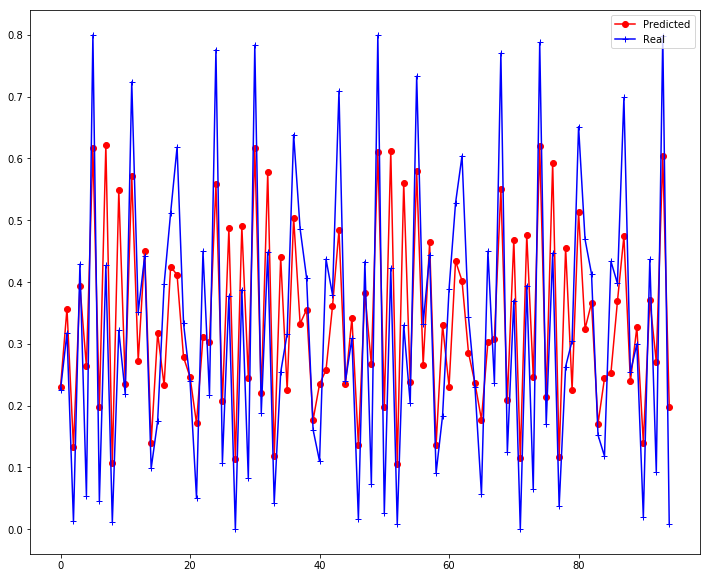

In [16]:
#Verifica resultados
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# EXECUTE A OPERAÇÃO COM OS DADOS DE TREINAMENTO E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS
y_pred = tdnn_operation(vInputsTrain.T, [W_1, W_2], [B_1, B_2])

y_pred = y_pred.T

E_ABS = np.abs(vOutputsTrain - y_pred) #Erro absoluto
ERM   = np.average(E_ABS) #Erro Relativo Médio
print(ERM)

outVar = np.var(y_pred - vOutputs)
print(outVar)

print(y_pred)
print('---')
print(vOutputsTrain.T)

plt.figure(figsize=(12,10))
plt.plot(range(len(y_pred)), y_pred, 'ro-')
plt.plot(range(len(vOutputsTrain)), vOutputsTrain, 'b+-')
plt.gca().legend(('Predicted', 'Real'))

# 2.4 - Verificação dos resultados do conjunto de teste

In [17]:
#Carrega dados - Teste
# EXECUTE A OPERAÇÃO COM OS DADOS DE TESTE E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS
dfTestFile = loadDataFile('ds_stock_price_operation_R1.csv')

vInputsTest = np.array(dfTestFile['x1']).reshape(-1, 1)
X = tdnn_windowing2(nInputs, vInputsTest)

vInputsTest  = X[:, 0:nInputs]
vOutputsTest = X[:, nInputs + nOutputs - 1].reshape(-1, nOutputs)

nSamples = len (vInputsTest)

y_pred = tdnn_operation(vInputsTest.T, [W_1, W_2], [B_1, B_2])

print(y_pred)
print('---')
print(vOutputsTest.T)

[[0.60282093 0.10482744 0.57194643 0.2410183  0.5872036  0.25856607
  0.4785373  0.13330076 0.34375063 0.22917057 0.44330638 0.3925349
  0.29345199 0.22664549 0.18381095 0.29538564 0.31446253 0.54202801
  0.21137154 0.45007847]]
---
[[0.4173 0.0062 0.3387 0.1886 0.7418 0.3138 0.4466 0.0835 0.193  0.3807
  0.5438 0.5897 0.3536 0.221  0.0631 0.4499 0.2564 0.7642 0.1411 0.3626]]


# 2.5 - Calcule o erro absoluto médio da TDNN

In [18]:
#Verifica resultados 
y_pred = y_pred.T

E_ABS = np.abs(vOutputsTest - y_pred) #Erro absoluto
ERM   = np.average(E_ABS) #Erro Relativo Médio
print(ERM)

outVar = np.var(y_pred - vOutputsTest)
print(outVar)

0.11201617994723598
0.016685368885356232


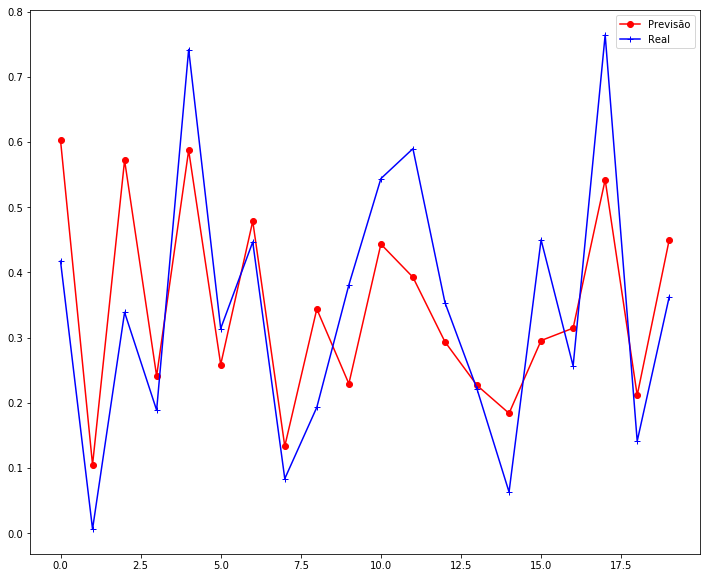

In [19]:
plt.figure(figsize=(12,10))
plt.plot(range(len(y_pred)), y_pred, 'ro-')
plt.plot(range(len(vOutputsTest)), vOutputsTest, 'b+-')
plt.gca().legend(('Previsão', 'Real'))

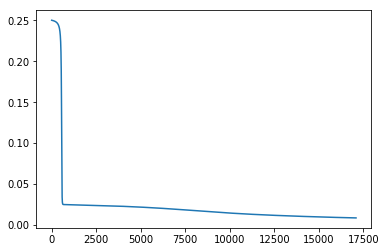

In [20]:
#Erro Quadratico Medio
plt.figure()
plt.plot(range(len(MSE)-1), MSE[1:])